In [361]:
#Instalación de Librerias
import pandas as pd
import numpy as np
import math
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import spearmanr
import scipy.stats as stats
from scipy import stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest, t, levene, bartlett, chi2_contingency
from scipy.stats import ks_2samp
# -----------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) 
import warnings
warnings.filterwarnings("ignore")

# Fase 1. Exploración y Limpieza

## 1.1 Exploración inicial

In [243]:
#Lectura de los ficheros
flight=pd.read_csv('Customer Flight Activity.csv')
loyalty=pd.read_csv('Customer Loyalty History.csv')

### 1.1.1 Exploracion de datos columnas e información general

#### A) Fichero Flight

In [244]:
# Mostrar las primeras y las últimas  filas de cada archivo
## Fichero flight
flight.head()


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [245]:
flight.tail()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [246]:
# Estudio de la estructura del fichero
flight.shape
print(f"En el DataFrame tenemos un total de {flight.shape[0]} filas y {flight.shape[1]} columnas.")

En el DataFrame tenemos un total de 405624 filas y 10 columnas.


In [247]:
# Obtener información general de cada DataFrame
flight.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


#### B) Fichero Loyalty

In [248]:
## Fichero Loyalty
loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [249]:
loyalty.tail()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [250]:
loyalty.shape

print(f"En el DataFrame tenemos un total de {loyalty.shape[0]} filas y {loyalty.shape[1]} columnas.")

En el DataFrame tenemos un total de 16737 filas y 16 columnas.


In [251]:
# Obtener información general de cada DataFrame
loyalty.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

### 1.1.2 Analisis de Duplicados 

#### A) Fichero Flight

In [252]:
# Identificar filas duplicadas en flight
duplicates_flight = flight[flight.duplicated()]

# Contar el número de filas duplicadas
num_duplicates_flight = len(duplicates_flight)

print(f"Número total de filas duplicadas en flight: {num_duplicates_flight}")

Número total de filas duplicadas en flight: 1864


In [253]:
# Mostrar las filas duplicadas
print("\nFilas duplicadas en flight:")

duplicates_flight



Filas duplicadas en flight:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.0,0,0
404884,960050,2018,12,0,0,0,0,0.0,0,0
405111,971370,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0


In [254]:
# Identificar  todas las filas  duplicadas en flight ya que con el código anterior no puedo identifcar el patron
duplicates_flight = flight[flight.duplicated(keep=False)] # Al añadir keep=False vemos que todas las instancias de duplicados se muestre

In [255]:
# Mostrar toda la información de los registros duplicados usando iloc
print("Registros completamente duplicados en flight:")
# Hemos usado un iloc para flitrar todos los duplicados de flight donde  donde iloc[:, :]muestra la informacion de todas las columnas y filas
print(duplicates_flight.iloc[:, :])  

Registros completamente duplicados en flight:
        Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
41              101902  2017      1               0                        0   
42              101902  2017      1               0                        0   
226             112142  2017      1               0                        0   
227             112142  2017      1               0                        0   
477             126100  2017      1               0                        0   
...                ...   ...    ...             ...                      ...   
405111          971370  2018     12               0                        0   
405409          988392  2018     12               0                        0   
405410          988392  2018     12               0                        0   
405436          989528  2018     12               0                        0   
405437          989528  2018     12               0                       

Como podemos observar los valores duplicados se encuentran el la columna "Loyalty Number" que repite la misma información en las filas que tienen el mismo "Loyalty Number"

In [256]:
# Tratamiento de los valores duplicados
# Al ver que los duplicados son el loyalty number que repite la misma información en varias filas hemos decidido proceder a su eliminacion.
#Vamos a usar drop para eliminar los duplicados y aplicamos inplace=True para que los cambios se mantengan en el df original 

In [257]:
# Eliminar duplicados en flight y modificar el dataframe original
flight.drop_duplicates(inplace=True)

# Resetear el índice del dataframe después de eliminar duplicados
flight.reset_index(drop=True)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0,0
403756,999911,2018,12,0,0,0,0,0.0,0,0
403757,999940,2018,12,3,0,3,1233,123.0,0,0
403758,999982,2018,12,0,0,0,0,0.0,0,0


In [258]:
# Contar el número de registros duplicados basados en todas las columnas
num_registros_duplicados = flight.duplicated().sum()

# Mostrar el número de registros duplicados
print(f"Número de registros duplicados en flight: {num_registros_duplicados}")

Número de registros duplicados en flight: 0


In [259]:
print(f"En el DataFrame final tenemos un total de {flight.shape[0]} filas y {flight.shape[1]} columnas.")

En el DataFrame final tenemos un total de 403760 filas y 10 columnas.


#### B) Fichero Loyalty 

In [260]:
# Identificar filas duplicadas en loyalty
duplicates_loyalty = loyalty[loyalty.duplicated()]

# Contar el número de filas duplicadas
num_duplicates_loyalty = len(duplicates_loyalty)

print(f"Número total de filas duplicadas en loyalty: {num_duplicates_loyalty}")

Número total de filas duplicadas en loyalty: 0


### 1.1.3 Analisis de los valores nulos iniciales

#### A) Flight 

In [261]:
# Valores nulos en flight
print("Porcentaje de valores nulos en flight:")
print((flight.isnull().sum() / len(flight)) * 100)

Porcentaje de valores nulos en flight:
Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64


#### B) Loyalty

In [262]:
# Valores nulos en loyalty
print("Valores nulos en loyalty:")
print((loyalty.isnull().sum() / len(loyalty)) * 100)

Valores nulos en loyalty:
Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64


- El tratamiento de los valores nulos, se va a hacer una vez meregado las tablas. 

- La limpieza de los valores nulos antes de la unión de las tablas puede afectar a la integridad del datos y reducir la cantidad de los datos disponibles (ya que podemos estar haciendo una imputacion inadecuada de los datos), por lo que entendemos que es mejor unir primero y luego limpiar ya que se pueden presevar muchos más datos.

###  1.1.4 Análisis Exploratorio incial individual

#### A) Flight 

In [263]:
# Usamos describe para generar estadisticas descriptivas de las columnas nùmericas del dataframe

flight.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.0,326699.0,550598.0,772152.0,999986.0
Year,403760.0,2017.500352,0.500000,2017.0,2017.0,2018.0,2018.0,2018.0
Month,403760.0,6.501335,3.451982,1.0,4.0,7.0,10.0,12.0
Flights Booked,403760.0,4.134050,5.230064,0.0,0.0,1.0,8.0,21.0
Flights with Companions,403760.0,1.036569,2.080472,0.0,0.0,0.0,1.0,11.0
Total Flights,403760.0,5.170619,6.526858,0.0,0.0,1.0,10.0,32.0
Distance,403760.0,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0
Points Accumulated,403760.0,124.263761,146.696179,0.0,0.0,53.0,240.0,676.5
Points Redeemed,403760.0,30.838587,125.758002,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.0,0.0,0.0,0.0,71.0


**Year y Month**</p>

- **mean o media**: El año promedio de las reservas de vuelos es 2017,5.
- **std o desviación media**: Es igual  0.5 para el la columna año  lo que puede indicar que la mayoría de las reservas se concentran en 2017 y 2018. 
- **min**: El valor mínimo de 2017 para el año indica que todos los registros están limitados a este año y al siguiente.
- **Analisis de los Cuartiles**: Estos percentiles para el mes (Month) muestran cómo se distribuyen los meses a lo largo del año. Por ejemplo, el 25% de las reservas ocurren en o antes de abril (mes 4), la mediana está en julio (mes 7), y el 75% de las reservas están en octubre (mes 10), lo que puede indicar una estacionalidad en la reserva de largo del año
- **max**: El valor máximo de 2018 para el año indica que no hay registros más allá de este año.

**Flights Booked, Flights with Companions, Total Flights** </p>
En en el caso de las variables relacionadas con los vuelos, el resumen de los estadisticos es el siguiente:

- **mean o media**: Las medias de 4.13 para Flights Booked, 1.04 para Flights with Companions, y 5.17 para Total Flights. </p>
- **std**: Las desviaciones estándar de 5.23 para Flights Booked, 2.08 para Flights with Companions, y 6.53 para Total Flights muestran la dispersión de los datos alrededor de la media. </p>
- **min**: Los valores mínimos de 0 indican que hay registros donde no se reservaron vuelos o no hubo vuelos con otras compañias. </p>
- **max**: Los valores máximos de 21 para Flights Booked, 11 para Flights with Companions, y 32 para Total Flights indican los máximos observados en estas variables.


**Distance** </p>

- **mean o media**:La media de 1.214,46 indica la distancia promedio de los vuelos reservados en el conjunto de datos.
- **std**: La desviación estándar de 1,434.10 muestra la variabilidad de las distancias de vuelo e indica que las distancias de los vuelos tiendan a estar más dispersas alrededor de lamedia.
- **min**: El valor mínimo de 0 indica que hay registros sin distancia de vuelo.
-**Analisis de los Cuartiles**:25%, 50%, 75%: Estos percentiles muestran cómo se distribuyen las distancias de vuelo en el conjunto de datos, donde el 25% de los vuelos tiene una distancia de 525, la mitad de los vuelos recorren una distancia  de 2342 y el 75% de los vuelos tienen una distancia igual o superior a 6293

**Points Accumulated, Points Redeemed, Dollar Cost Points Redeemed** </p>

- **mean o media**: Las medias de 124,26 para Points Accumulated, 30,84 para Points Redeemed, y 2,50 para Dollar Cost Points Redeemed 
- **std**: Las desviaciones estándar de 146,70 para Points Accumulated, significa que los puntos acumulados tienden a estar dispersos alrededor de la media de puntos, la desviación de  Points Redeemed es 125,76 e indica que los valores de los puntos canjeados varían bastante de un caso a otro Finalmente para Dollar Cost Points Redeeme la desviación es 10,17 y por lo tanto estos valores estan mas cerca de la media, tienen menos variabilidad.
- **min**Los valores mínimos de 0 indican que hay registros sin puntos acumulados, puntos canjeados, o costos en dólares de puntos canjeados.
- **max**: Los valores máximos de 676,5 para Points Accumulated, 876.0 para Points Redeemed, y 71.0 para Dollar Cost Points Redeemed 

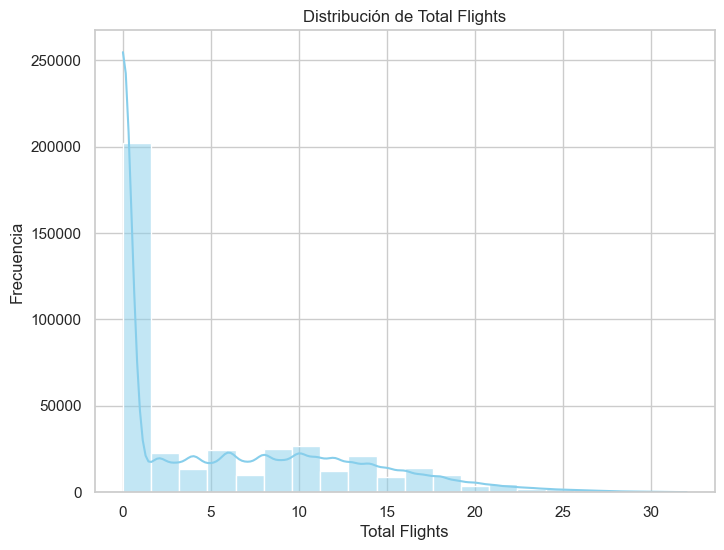

In [264]:
#Histograma de 'Total Flights
plt.figure(figsize=(8, 6))
sns.histplot(flight['Total Flights'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Total Flights')
plt.xlabel('Total Flights')
plt.ylabel('Frecuencia')
plt.show()


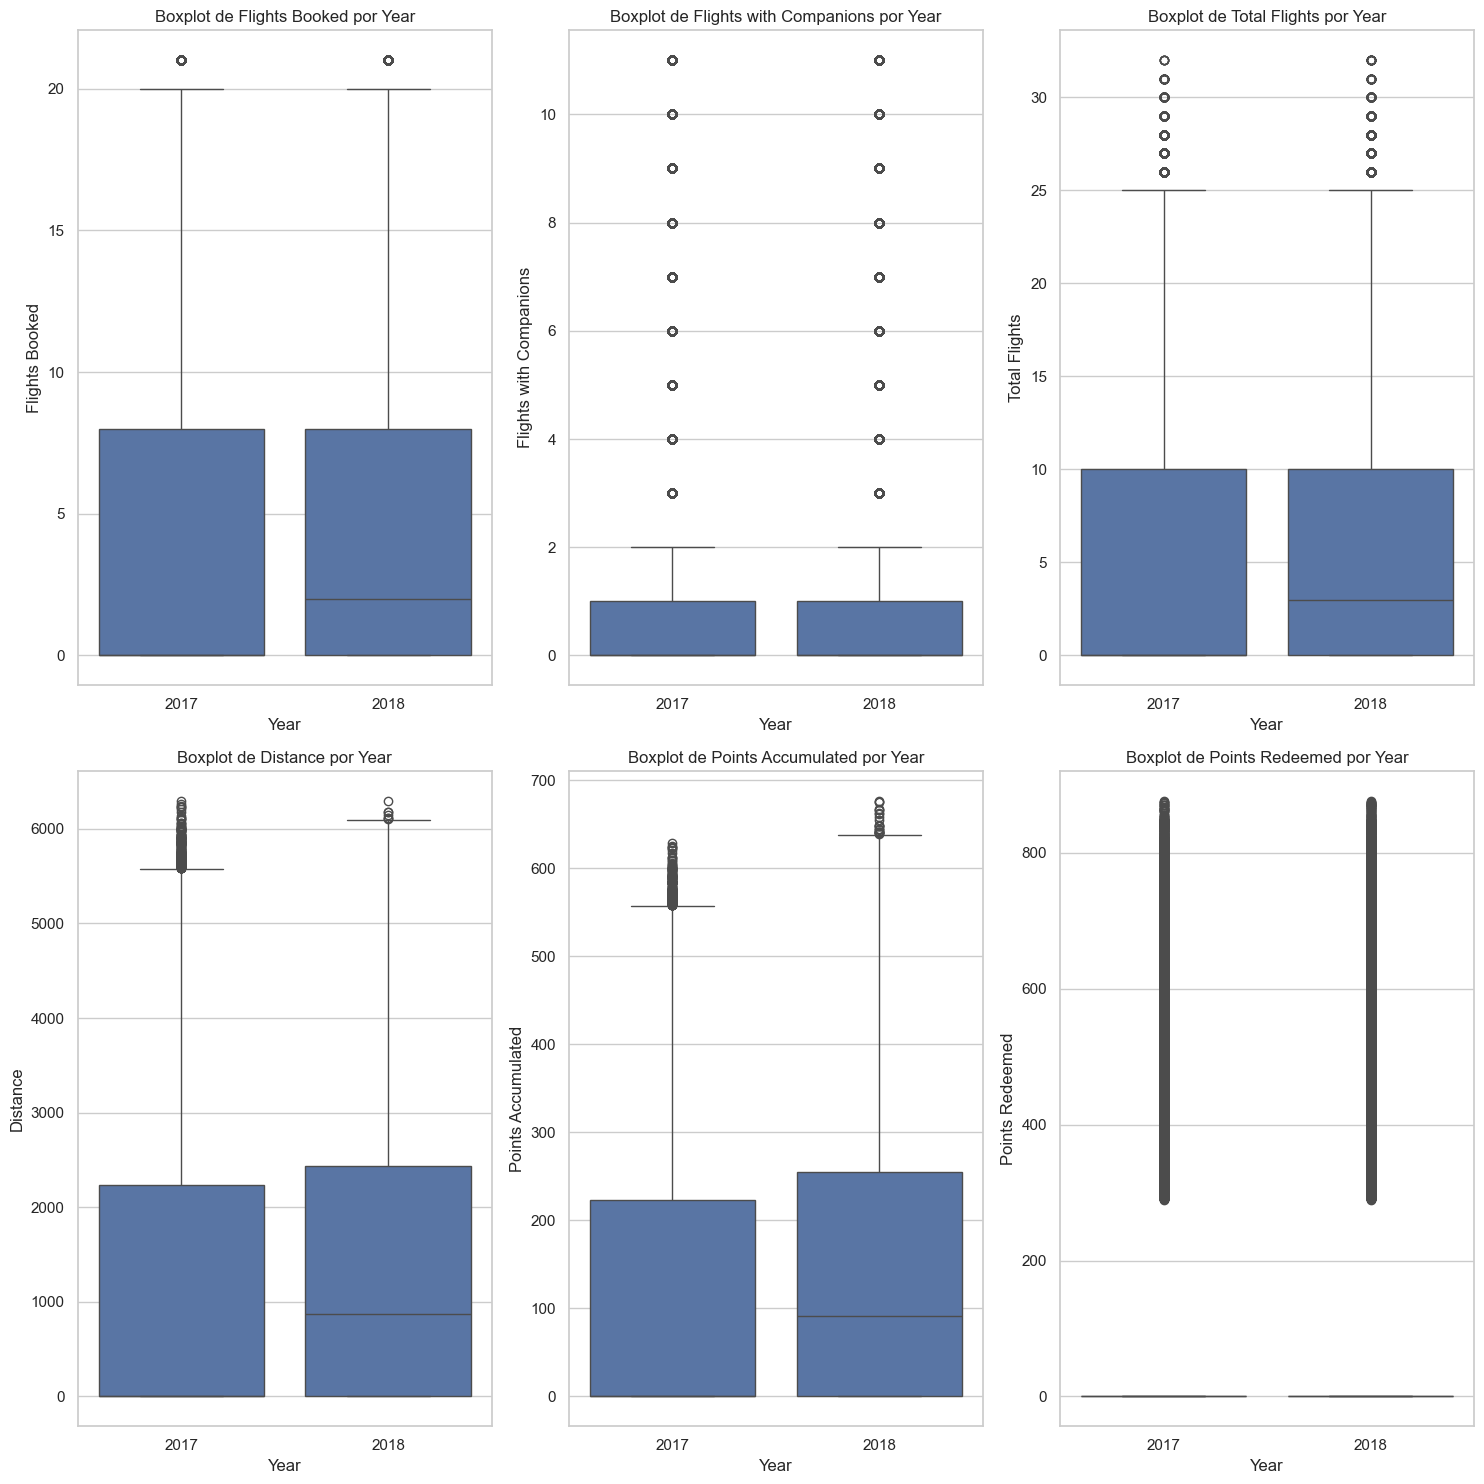

In [265]:
# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# Variables numéricas a incluir en el boxplot
numeric_variables = ['Flights Booked', 'Flights with Companions', 'Total Flights', 
                     'Distance', 'Points Accumulated', 'Points Redeemed', 
                     ]

# Iterar sobre cada variable y dibujar el boxplot por año  
for i, var in enumerate(numeric_variables): #Iteramos sobre cada variable numérica (var) agrupado por year
    row = i // 3
    col = i % 3
    sns.boxplot(x='Year', y=var, data=flight, ax=axes[row, col]) #Utilizamos sns.boxplot() para dibujar cada boxplot en el subplot correspondiente (axes[row, col])
    axes[row, col].set_title(f'Boxplot de {var} por Year')
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel(var)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### B) Loyalty

In [266]:
loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


**Salary**</p>

- **count**: Hay 12499 registros en esta variable.
- **mean o media**: El año promedio del salario es 79.245,61
- **std o desviación media**: Es igual  35.008,30 es grande en comparación con la media, lo que sugiere que los salarios varían significativamente alrededor de este valor promedio.
- **min**: El valor mínimo de -58.486  
- **Analisis de los Cuartiles**: el 25% de los salarios del conjunto esta en 59.246,50. El 50% de los salarios están por debajo de 73.455 y el 75% de los salarios esta por debajo de 88517,50
- **max**: El valor máximo es 407228, es decir alguno de los pasajeros tienen unos ingresos de esa cantidad

**CLTV**</p>

- **count**: Hay 16.737 registros en esta variable.
- **mean o media**: El valor economico que se dejan los clientes  7.988,90
- **std o desviación media**: Es igual 6.860.98 indica que los valores estan bastante dispersos alredredor de la media.
- **min**: El valor mínimo de 1.898,01  
- **Analisis de los Cuartiles**: el 25% de los clientes tiene un CLV  CLV tienen un valor igual o inferior a 3.980,84, El 50% de los registros de CLV tienen un valor igual o inferior a 5.780,18 el otro 50% tienen un valor igual o superior a este número. Por último  75% de los registros de CLV tienen un valor igual o inferior a 8.940,58
- **max**: 83.325,38

**Enrollment Month y Cancellation Month**</p>

Ambas variables siguen un patrón similar en sus estadísticas descriptivas

**Cancellation Year**</p>

- **count**: Hay 2.067 registros en esta variable.
- **mean o media**: El promedio de las cancelaciones es para el año 2016
- **std o desviación media**: Es igual 1.38 indica que los valores estan bastante dispersos alredredor de la media.
- **min**: El valor mínimo de 2013
- **Analisis de los Cuartiles**: el 25% de las cancelaciones tiene estan  en 2016. El 50% de los registros tienen un valor igual o inferior tienen un valor de a 2017 y el 75% de los  registros tienen un valor igual o inferior al año 2018.
- **max**: 2018

**Cancellation Month**</p>

- **count**: Hay 2.067 registros en esta variable.
- **mean o media**: El promedio de las cancelaciones es para el año 6.96.
- **std o desviación media**: Es igual 3.46 indica que los valores estan bastante dispersos alredredor de la media,es decir significa que los meses en que ocurren las cancelaciones tienden a estar dispersos alrededor de la media de 6.96. 

- **Analisis de los Cuartiles**: el 25% de los meses cancelados tiene estan  es  4. El 50% de los registros tienen un valor igual o inferior tienen un valor de a 7 y el 75% de los  registros tienen un valor igual o inferior 10 octubre.


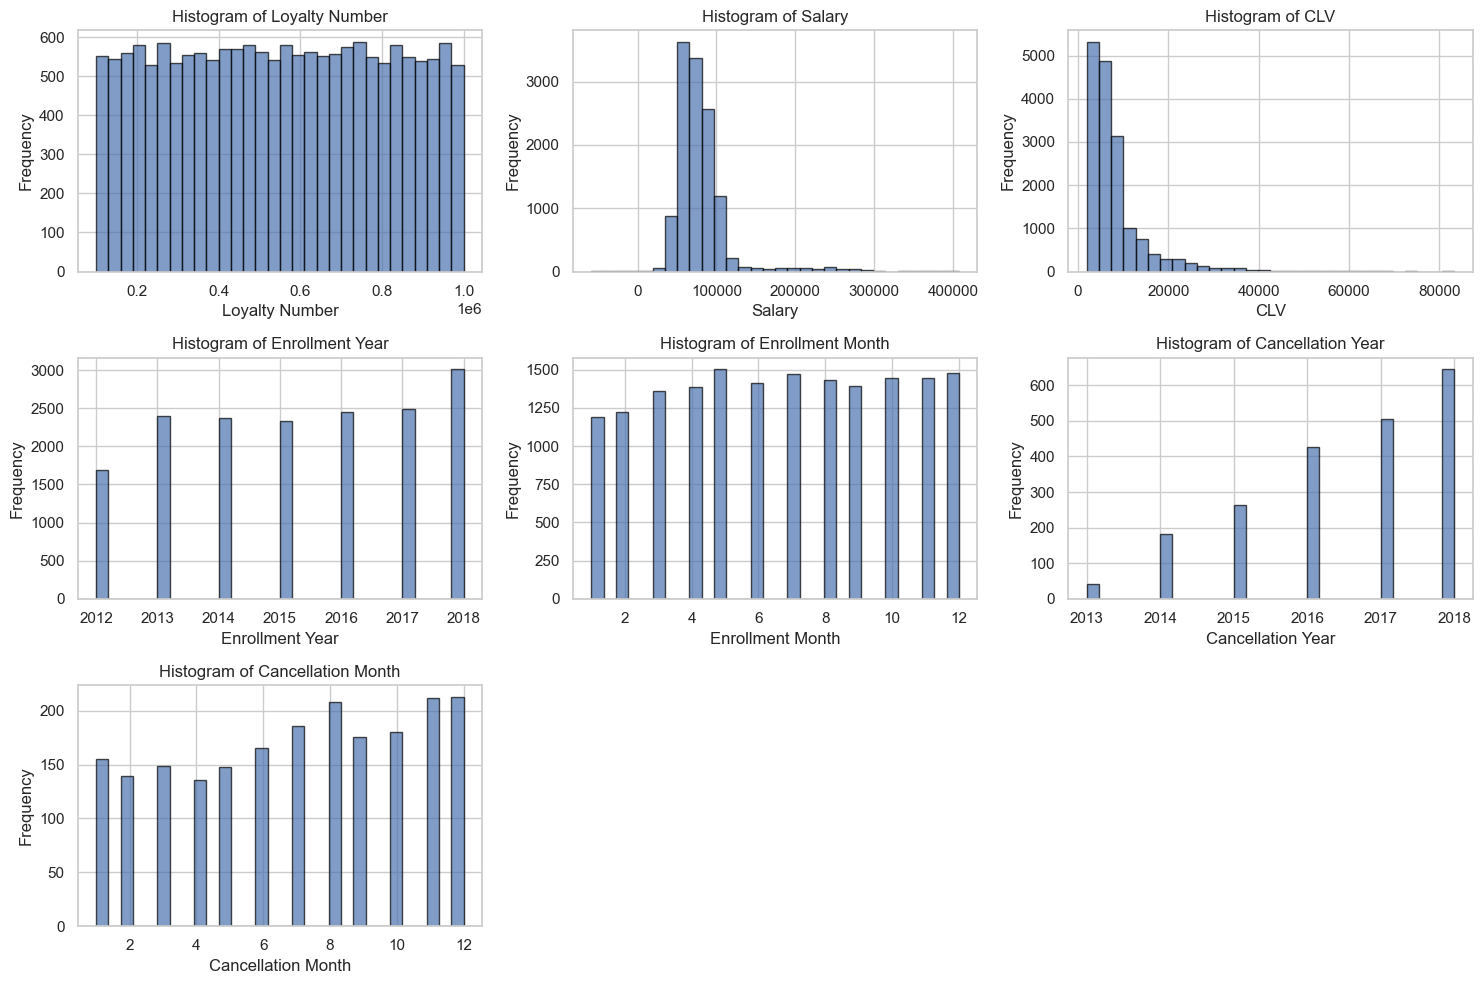

In [267]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que 'loyalty' es tu dataframe con los datos

# Obtener solo las columnas numéricas para el histograma
numeric_columns = loyalty.select_dtypes(include='number').columns

# Configurar la disposición de los subplots
num_plots = len(numeric_columns)
num_cols = 3  # Número de columnas en la disposición de subplots
num_rows = (num_plots // num_cols) + (num_plots % num_cols)  # Calcular el número de filas que hay que tener en los graficos en funcion del numero de columnas

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Iterar sobre cada columna numérica y crear un histograma
#Usamos un for por cada una de las columnas numerica y vamos iterando para que se vaya creando un histograma
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.hist(loyalty[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')

# Ajustar el espacio entre subplots para evitar superposiciones
plt.tight_layout()

# Mostrar los histogramas
plt.show()


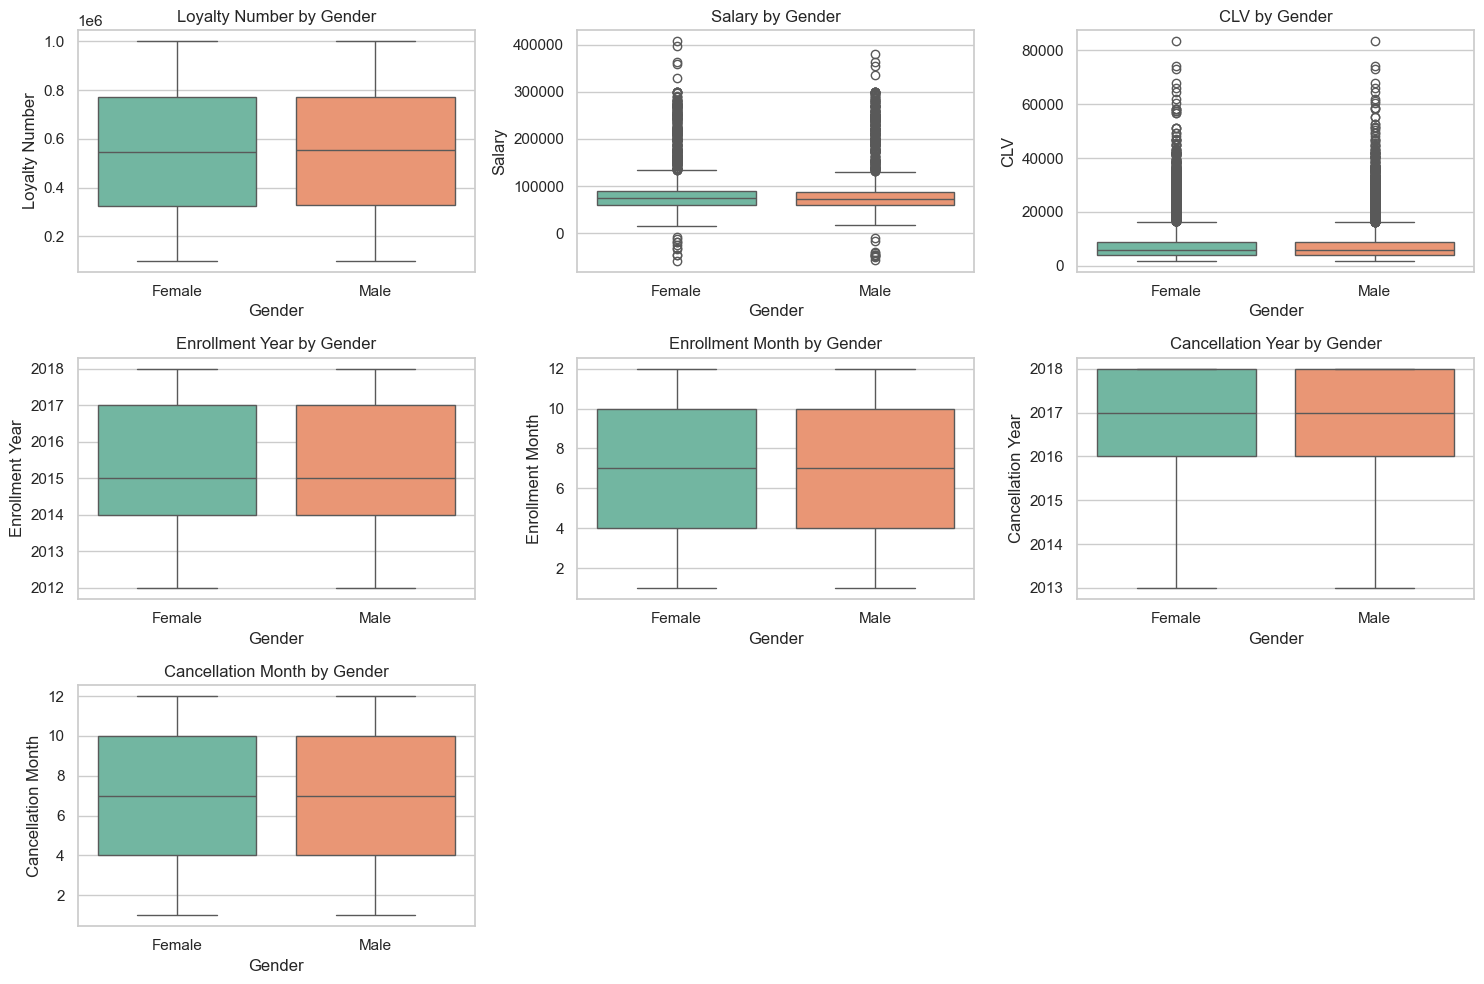

In [268]:

numeric_columns = loyalty.select_dtypes(include='number').columns
categorical_column = 'Gender'

# Configurar el tamaño de la figura según el número de columnas numéricas
num_plots = len(numeric_columns)
num_cols = 3  # Número de columnas en la disposición de subplots
num_rows = (num_plots // num_cols) + (num_plots % num_cols)  # Calcular el número de filas

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Iterar sobre cada variable numérica y crear un boxplot por género
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=categorical_column, y=col, data=loyalty, palette='Set2')
    plt.xlabel(categorical_column)
    plt.ylabel(col)
    plt.title(f'{col} by {categorical_column}')

# Ajustar el espacio entre subplots para evitar superposiciones
plt.tight_layout()

# Mostrar los boxplots
plt.show()


###  1.1.5 Unión de Ficheros

In [269]:
# Hemos unido los ficheros usando un "right" ya que de esta forma aseguramos toda la información del fichero de los vuelos, 
# Un mismo cliente puede realizar varios vuelos.
df_final = pd.merge(loyalty, flight, on='Loyalty Number', how='right')

In [270]:
df_final.shape

(403760, 25)

## 1.2 Limpieza

###  1.2.1 Analisis Exploratorio

In [271]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.00,772152.00,999986.00
Salary,301500.0,79258.576285,34983.929798,-58486.00,59262.00,73479.00,88606.00,407228.00
CLV,403760.0,7990.864857,6863.317160,1898.01,3981.78,5776.34,8937.12,83325.38
Enrollment Year,403760.0,2015.250716,1.979427,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,403760.0,6.667555,3.398829,1.00,4.00,7.00,10.00,12.00
Cancellation Year,49650.0,2016.504350,1.380482,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,49650.0,6.962095,3.454362,1.00,4.00,7.00,10.00,12.00
Year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.00,2018.00,2018.00
Month,403760.0,6.501335,3.451982,1.00,4.00,7.00,10.00,12.00
Flights Booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00


In [272]:
# Obtener información general de cada DataFrame
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Country                      403760 non-null  object 
 2   Province                     403760 non-null  object 
 3   City                         403760 non-null  object 
 4   Postal Code                  403760 non-null  object 
 5   Gender                       403760 non-null  object 
 6   Education                    403760 non-null  object 
 7   Salary                       301500 non-null  float64
 8   Marital Status               403760 non-null  object 
 9   Loyalty Card                 403760 non-null  object 
 10  CLV                          403760 non-null  float64
 11  Enrollment Type              403760 non-null  object 
 12  Enrollment Year              403760 non-null  int64  
 13 

In [273]:
df_final.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [274]:
print("Porcentaje de valores nulos en flight:")
print((df_final.isnull().sum() / len(df_final)) * 100)

Porcentaje de valores nulos en flight:
Loyalty Number                  0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.326927
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.703091
Cancellation Month             87.703091
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed   

In [275]:
df_final.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0,0
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,2017,1,10,4,14,2030,203.0,0,0
2,100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,2017,1,6,0,6,1200,120.0,0,0
3,100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
4,100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN,2017,1,0,0,0,0,0.0,0,0


###  1.2.2 Principales Valores Unicos Variables Categoricas y Númericas

#### A) Variables Categóricas

In [276]:
# Filtrar las columnas categóricas
# Vamos a analizar los valores de las columnas categóricas para ver posibles valores anomalos, vacios o outliers.
categoricas_columns = df_final.select_dtypes(include='object').columns 

In [277]:
for col in categoricas_columns:
    print(f"Valores únicos y recuento de frecuencias para la columna '{col}':")
    print(df_final[col].value_counts()) #Selecciona la columana del dataframe y hace un conteo con value-counts
    print("\n")

Valores únicos y recuento de frecuencias para la columna 'Country':
Country
Canada    403760
Name: count, dtype: int64


Valores únicos y recuento de frecuencias para la columna 'Province':
Province
Ontario                 130258
British Columbia        106442
Quebec                   79573
Alberta                  23360
Manitoba                 15900
New Brunswick            15352
Nova Scotia              12507
Saskatchewan              9861
Newfoundland              6244
Yukon                     2679
Prince Edward Island      1584
Name: count, dtype: int64


Valores únicos y recuento de frecuencias para la columna 'City':
City
Toronto           80775
Vancouver         62314
Montreal          49687
Winnipeg          15900
Whistler          13994
Halifax           12507
Ottawa            12262
Edmonton          11768
Trenton           11710
Quebec City       11698
Dawson Creek      10725
Fredericton       10266
Regina             9861
Kingston           9652
Tremblant          9576
Vi

A primera vista parece que todos los valores estan bien, sin embargo hemos detectado que la columna country tiene un solo valor 
en cada una de sus filas, por lo que se puede valorar su eliminación en el analisis del fichero

#### B) Variables Numéricas

In [278]:
# Identificar las columnas numéricas
numeric_columns = df_final.select_dtypes(include=['number']).columns



In [279]:
# Mostrar los valores únicos para cada columna numérica
print("\nValores únicos para las columnas numéricas:")
for col in numeric_columns:
    print(f"\nColumna '{col}':")
    print(df_final[col].unique())


Valores únicos para las columnas numéricas:

Columna 'Loyalty Number':
[100018 100102 100140 ... 999731 999788 999891]

Columna 'Salary':
[92552.    nan 63253. ... 23160. 97206. 56345.]

Columna 'CLV':
[7919.2  2887.74 2838.07 ... 6990.69 3151.16 8409.07]

Columna 'Enrollment Year':
[2016 2013 2015 2014 2012 2017 2018]

Columna 'Enrollment Month':
[ 8  3  7  1  9  5 10  2  4  6 11 12]

Columna 'Cancellation Year':
[  nan 2018. 2015. 2016. 2014. 2013. 2017.]

Columna 'Cancellation Month':
[nan  3.  9.  2.  7.  6.  8.  4.  1.  5. 11. 12. 10.]

Columna 'Year':
[2017 2018]

Columna 'Month':
[ 1  9  2  3 11  4  5  7  6  8 10 12]

Columna 'Flights Booked':
[ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]

Columna 'Flights with Companions':


[ 0  4  7  1  6  3  5  2 10  8  9 11]

Columna 'Total Flights':
[ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19 18 21 26 20
 23 25 27 24 28 30 29 31 32]

Columna 'Distance':
[1521 2030 1200 ... 1217  617 4135]

Columna 'Points Accumulated':
[152.   203.   120.   ...  18.75 601.   626.  ]

Columna 'Points Redeemed':
[  0 341 364 310 445 312 343 366 389 292 447 324 456 409 436 327 322 291
 323 300 290 309 325 386 321 363 340 670 443 517 444 328 344 367 313 333
 293 449 297 455 372 356 405 381 466 419 369 352 482 335 329 305 415 396
 317 348 314 334 350 330 318 298 420 336 471 680 441 353 484 301 374 417
 501 299 398 307 368 306 347 439 395 481 337 382 426 373 399 424 326 392
 438 467 480 448 308 400 376 375 460 339 385 611 431 320 362 404 442 410
 361 319 435 414 464 477 315 485 370 421 349 371 416 496 510 667 465 434
 346 487 408 500 360 378 345 358 479 380 411 491 505 446 425 476 393 418
 332 401 454 303 594 506 355 302 403 379 437 561 483 597 391 562 342 407
 490 468 488 

A primera vista parece que todos los valores de salary, cancellation year y cancellation month tiene varios valores nulos
que deberán ser tratados en los analisis posteriores.

### 1.2.2 Estandarización Columnas

In [280]:
# Cambiar los nombres de las columnas a minúsculas
df_final.columns = df_final.columns.str.lower()

In [281]:
# Paso 1: Identificar las columnas categóricas
categorical_columns = df_final.select_dtypes(include=['object', 'category']).columns

# Paso 2: Convertir los valores de las columnas categóricas a minúsculas
for col in categorical_columns:
    df_final[col] = df_final[col].str.lower()

In [282]:
df_final.columns

Index(['loyalty number', 'country', 'province', 'city', 'postal code',
       'gender', 'education', 'salary', 'marital status', 'loyalty card',
       'clv', 'enrollment type', 'enrollment year', 'enrollment month',
       'cancellation year', 'cancellation month', 'year', 'month',
       'flights booked', 'flights with companions', 'total flights',
       'distance', 'points accumulated', 'points redeemed',
       'dollar cost points redeemed'],
      dtype='object')

In [283]:
df_final.head()

,loyalty number,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed
0,100018,canada,alberta,edmonton,t9g 1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0,0
1,100102,canada,ontario,toronto,m1r 4k3,male,college,NaN,single,nova,2887.74,standard,2013,3,NaN,NaN,2017,1,10,4,14,2030,203.0,0,0
2,100140,canada,british columbia,dawson creek,u5i 4f1,female,college,NaN,divorced,nova,2838.07,standard,2016,7,NaN,NaN,2017,1,6,0,6,1200,120.0,0,0
3,100214,canada,british columbia,vancouver,v5r 1w3,male,bachelor,63253.0,married,star,4170.57,standard,2015,8,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
4,100272,canada,ontario,toronto,p1l 8x8,female,bachelor,91163.0,divorced,star,6622.05,standard,2014,1,NaN,NaN,2017,1,0,0,0,0,0.0,0,0


### 1.2.3 Limpieza de Variables

In [284]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty number               403760 non-null  int64  
 1   country                      403760 non-null  object 
 2   province                     403760 non-null  object 
 3   city                         403760 non-null  object 
 4   postal code                  403760 non-null  object 
 5   gender                       403760 non-null  object 
 6   education                    403760 non-null  object 
 7   salary                       301500 non-null  float64
 8   marital status               403760 non-null  object 
 9   loyalty card                 403760 non-null  object 
 10  clv                          403760 non-null  float64
 11  enrollment type              403760 non-null  object 
 12  enrollment year              403760 non-null  int64  
 13 

In [285]:
# Vamos a cambiar las columnas de cancellation year y cancellation month a int

In [286]:
#Funcion para convierte flot a int 
def convert_float_to_int(df, columns):
    for col in columns: #iteracion sobre las columnas 
        df[col] = df[col].astype('int64', errors='ignore') 

In [287]:
columns_to_convert = ['cancellation year', 'cancellation month']
convert_float_to_int(df_final, columns_to_convert)

In [288]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty number               403760 non-null  int64  
 1   country                      403760 non-null  object 
 2   province                     403760 non-null  object 
 3   city                         403760 non-null  object 
 4   postal code                  403760 non-null  object 
 5   gender                       403760 non-null  object 
 6   education                    403760 non-null  object 
 7   salary                       301500 non-null  float64
 8   marital status               403760 non-null  object 
 9   loyalty card                 403760 non-null  object 
 10  clv                          403760 non-null  float64
 11  enrollment type              403760 non-null  object 
 12  enrollment year              403760 non-null  int64  
 13 

In [289]:
# Vamos a cambiar los meses de enrolloment, cancellation y flight a meses en lugar de numeros 

In [290]:
month_names = {
    1: 'January', 
    2: 'February', 
    3: 'March', 
    4: 'April', 
    5: 'May', 
    6: 'June', 
    7: 'July', 
    8: 'August', 
    9: 'September', 
    10: 'October', 
    11: 'November', 
    12: 'December'
}

In [291]:
columns_to_convert = ['enrollment month', 'cancellation month', 'month']

# Aplicar el diccionario a cada columna
for col in columns_to_convert:
    df_final[col] = df_final[col].map(month_names) # Usamos map para aplicar el valor del diccionario de meses a cada columna de map

In [292]:
df_final.head(2)

,loyalty number,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed
0,100018,canada,alberta,edmonton,t9g 1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,August,NaN,NaN,2017,January,3,0,3,1521,152.0,0,0
1,100102,canada,ontario,toronto,m1r 4k3,male,college,NaN,single,nova,2887.74,standard,2013,March,NaN,NaN,2017,January,10,4,14,2030,203.0,0,0


In [293]:
# Cambiar dollar cost points redeemed y distance a float que ahora son int 
def convert_columns_to_float(df, columns):
    for col in columns:
        df[col] = df[col].astype(float)
    return df

In [294]:
columns_to_convert = ['dollar cost points redeemed', 'distance']
convert_columns_to_float(df_final, columns_to_convert)

,loyalty number,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed
0,100018,canada,alberta,edmonton,t9g 1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,August,NaN,NaN,2017,January,3,0,3,1521.0,152.0,0,0.0
1,100102,canada,ontario,toronto,m1r 4k3,male,college,NaN,single,nova,2887.74,standard,2013,March,NaN,NaN,2017,January,10,4,14,2030.0,203.0,0,0.0
2,100140,canada,british columbia,dawson creek,u5i 4f1,female,college,NaN,divorced,nova,2838.07,standard,2016,July,NaN,NaN,2017,January,6,0,6,1200.0,120.0,0,0.0
3,100214,canada,british columbia,vancouver,v5r 1w3,male,bachelor,63253.0,married,star,4170.57,standard,2015,August,NaN,NaN,2017,January,0,0,0,0.0,0.0,0,0.0
4,100272,canada,ontario,toronto,p1l 8x8,female,bachelor,91163.0,divorced,star,6622.05,standard,2014,January,NaN,NaN,2017,January,0,0,0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,canada,ontario,toronto,m1r 4k3,male,college,NaN,married,aurora,7290.07,standard,2014,May,NaN,NaN,2018,December,0,0,0,0.0,0.0,0,0.0
403756,999911,canada,newfoundland,st. john's,a1c 6h9,male,doctor,217943.0,single,nova,8564.77,standard,2012,August,NaN,NaN,2018,December,0,0,0,0.0,0.0,0,0.0
403757,999940,canada,quebec,quebec city,g1b 3l5,female,bachelor,47670.0,married,nova,20266.50,standard,2017,July,NaN,NaN,2018,December,3,0,3,1233.0,123.0,0,0.0
403758,999982,canada,british columbia,victoria,v10 6t5,male,college,NaN,married,star,2631.56,standard,2018,July,NaN,NaN,2018,December,0,0,0,0.0,0.0,0,0.0


In [295]:
convert_float_to_int(df_final, columns_to_convert)

In [296]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty number               403760 non-null  int64  
 1   country                      403760 non-null  object 
 2   province                     403760 non-null  object 
 3   city                         403760 non-null  object 
 4   postal code                  403760 non-null  object 
 5   gender                       403760 non-null  object 
 6   education                    403760 non-null  object 
 7   salary                       301500 non-null  float64
 8   marital status               403760 non-null  object 
 9   loyalty card                 403760 non-null  object 
 10  clv                          403760 non-null  float64
 11  enrollment type              403760 non-null  object 
 12  enrollment year              403760 non-null  int64  
 13 

In [297]:
#Eliminiacion de la columna country ya que es siempre el mismo valor "Canada"
df_final = df_final.drop('country', axis=1)

In [298]:
df_final.shape

(403760, 24)

###  1.2.4 Tratamiento Valores Nulos

In [299]:
print("Porcentaje de valores nulos en flight:")
print((df_final.isnull().sum() / len(df_final)) * 100)

Porcentaje de valores nulos en flight:
loyalty number                  0.000000
province                        0.000000
city                            0.000000
postal code                     0.000000
gender                          0.000000
education                       0.000000
salary                         25.326927
marital status                  0.000000
loyalty card                    0.000000
clv                             0.000000
enrollment type                 0.000000
enrollment year                 0.000000
enrollment month                0.000000
cancellation year              87.703091
cancellation month             87.703091
year                            0.000000
month                           0.000000
flights booked                  0.000000
flights with companions         0.000000
total flights                   0.000000
distance                        0.000000
points accumulated              0.000000
points redeemed                 0.000000
dollar cost points

In [300]:
# Identificar las columnas con valores nulos
columnas_con_nulos = ['salary', 'cancellation year', 'cancellation month']

# Crear el subset con las columnas que tienen valores nulos
#Hemos usado .loc  para seleccionar todas las filas (:) y solo las columnas especificadas columnas_con_nulos
subset_con_nulos = df_final.loc[:, columnas_con_nulos]

# Mostrar el subset resultante
print(subset_con_nulos.head())

    salary  cancellation year cancellation month
0  92552.0                NaN                NaN
1      NaN                NaN                NaN
2      NaN                NaN                NaN
3  63253.0                NaN                NaN
4  91163.0                NaN                NaN


#### A) Cancellation Month

In [301]:
# Al tener un alto % nulos lo solucionaremos rellenando los valores nulos en la columna con 'unknown' y al realizar el analisis de la 
# moda vemos que es diciembre.


In [302]:
# Calcular la moda de 'cancellation month'
mode_cancel_month = df_final['cancellation month'].mode()[0]

# Imprimir la moda encontrada
print(f"Moda de cancellation month: {mode_cancel_month}")

Moda de cancellation month: December


In [303]:
# Imputar los valores nulos con 'Unknown'
df_final['cancellation month'].fillna('Unknown', inplace=True)

#### B) Cancellation Year

In [304]:
mode_cancel_year = df_final['cancellation year'].mode()[0]

print(f"Moda de cancellation year: {mode_cancel_year}")

Moda de cancellation year: 2018.0


In [305]:
# Imputar los valores nulos con 'Unknown'
df_final['cancellation year'].fillna('Unknown', inplace=True)

In [306]:
print("Porcentaje de valores nulos en df_final:")
print((df_final.isnull().sum() / len(df_final)) * 100)

Porcentaje de valores nulos en df_final:
loyalty number                  0.000000
province                        0.000000
city                            0.000000
postal code                     0.000000
gender                          0.000000
education                       0.000000
salary                         25.326927
marital status                  0.000000
loyalty card                    0.000000
clv                             0.000000
enrollment type                 0.000000
enrollment year                 0.000000
enrollment month                0.000000
cancellation year               0.000000
cancellation month              0.000000
year                            0.000000
month                           0.000000
flights booked                  0.000000
flights with companions         0.000000
total flights                   0.000000
distance                        0.000000
points accumulated              0.000000
points redeemed                 0.000000
dollar cost poin

#### C) Salary

In [307]:
# Contar el número de valores negativos en 'salary'
negative_count = (df_final['salary'] < 0).sum()
print(f"Número de valores negativos en 'salary': {negative_count}")


Número de valores negativos en 'salary': 480


In [308]:
df_final['salary'] = df_final['salary'].abs() # Hemos usado abs para calcular el valor absoluto de los salarios y aplicarlos de nuevo al dataframe

print(df_final)

        loyalty number          province          city postal code  gender  \
0               100018           alberta      edmonton     t9g 1w3  female   
1               100102           ontario       toronto     m1r 4k3    male   
2               100140  british columbia  dawson creek     u5i 4f1  female   
3               100214  british columbia     vancouver     v5r 1w3    male   
4               100272           ontario       toronto     p1l 8x8  female   
...                ...               ...           ...         ...     ...   
403755          999902           ontario       toronto     m1r 4k3    male   
403756          999911      newfoundland    st. john's     a1c 6h9    male   
403757          999940            quebec   quebec city     g1b 3l5  female   
403758          999982  british columbia      victoria     v10 6t5    male   
403759          999986           ontario        ottawa     k1f 2r2  female   

       education    salary marital status loyalty card       cl

In [309]:
df_final.dtypes

loyalty number                   int64
province                        object
city                            object
postal code                     object
gender                          object
education                       object
salary                         float64
marital status                  object
loyalty card                    object
clv                            float64
enrollment type                 object
enrollment year                  int64
enrollment month                object
cancellation year               object
cancellation month              object
year                             int64
month                           object
flights booked                   int64
flights with companions          int64
total flights                    int64
distance                         int64
points accumulated             float64
points redeemed                  int64
dollar cost points redeemed      int64
dtype: object

In [310]:
#Hacemos una copia para poder hacer las pruebas
df_copy=df_final.copy()
df_copy.sample(2)

,loyalty number,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed
184835,994609,quebec,montreal,h2y 4r4,male,bachelor,81070.0,single,aurora,7850.13,standard,2014,May,Unknown,Unknown,2017,November,0,0,0,0,0.0,0,0
24423,154136,british columbia,whistler,v6t 1y8,male,bachelor,56183.0,married,star,4981.83,standard,2016,September,2017.0,June,2017,August,0,0,0,0,0.0,0,0


In [311]:
#Imputacion de valores con media, mediana, 

In [312]:
display(df_copy["salary"].describe().reset_index())
#print("----")

,index,salary
0,count,301500.000000
1,mean,79371.732902
2,std,34726.433958
3,min,9081.000000
4,25%,59262.000000
5,50%,73479.000000
6,75%,88606.000000
7,max,407228.000000


In [313]:
## Iterativo
# Instancia de IterativeImputer con un máximo de 20 iteraciones y un estado aleatorio fijo 42 para asegurar reproducibilidad.
imputer_iterative = IterativeImputer(max_iter=20, random_state=42)

# Esta función primero ajusta (entrena) el imputador a los datos y luego transforma los datos, imputando los valores faltantes.
imputer_iterative_imputado = imputer_iterative.fit_transform(df_copy[["salary"]])

#Se añade la columna imputada ('salary_iterative') al DataFrame df_copy
df_copy["salary_iterative"] = imputer_iterative_imputado

# Comprobamos los valores nulos en la columna "salary" después de la imputación
print(f"Después de la imputación iterativa, tenemos:\n{df_copy['salary_iterative'].isnull().sum()} valores nulos")

Después de la imputación iterativa, tenemos:
0 valores nulos


In [314]:
# El método Knn de imputación de valores nulos, se basa en la idea de que los valores de una fila de observaciones
# pueden ser aproximados a los valores de los vecinos más próximos en términos de alguna distancia.
#Creamos una instancia con imputer y el numero de vecinos
#ajustamos el imputer a los datos y transformamos los datos

In [315]:
imputer = KNNImputer(n_neighbors=1) 
# se suele considerar como n_neighbors=5 ya que da mas fiabilidad a a valores, pero debido al lento proceso de ejecución hemos escogido n_neighgors=1

#ajustamos y tranformamos los datos

df_copy_knn = imputer.fit_transform(df_copy[['salary']]) # fit_transform entrena el modelos de los datos y luego los transforma, imputando los valores resatntes

KeyboardInterrupt: 

In [316]:
#Vamos a comprobar los estadísticos:

df_copy[["salary", "salary_iterative"]].describe()

,salary,salary_iterative
count,301500.000000,403760.000000
mean,79371.732902,79371.732902
std,34726.433958,30008.343196
min,9081.000000,9081.000000
25%,59262.000000,63901.000000
50%,73479.000000,79371.732902
75%,88606.000000,82940.000000
max,407228.000000,407228.000000


Ambos conjuntos de datos tienen la misma media pero la mediana y la desviación estándar difieren, y en este caso es mejor salary_iterative para imputar valores nulos, ya que este conjunto de datos tiene una menor desviación estándar, lo que sugiere que los datos están menos dispersos y podrían ser más representativos de la población general.

In [317]:
# Eliminar la columna 'salary' con axis=1 e inplace=True
df_copy.drop(columns=['salary'], axis=1, inplace=True)



In [318]:
#Cambiamos el nombre de la columna que ha quedado para que mantenga el nombre de origen
df_copy.rename(columns={'salary_iterative': 'salary'}, inplace = True)

In [319]:
df_copy.columns

Index(['loyalty number', 'province', 'city', 'postal code', 'gender',
       'education', 'marital status', 'loyalty card', 'clv', 'enrollment type',
       'enrollment year', 'enrollment month', 'cancellation year',
       'cancellation month', 'year', 'month', 'flights booked',
       'flights with companions', 'total flights', 'distance',
       'points accumulated', 'points redeemed', 'dollar cost points redeemed',
       'salary'],
      dtype='object')

In [320]:
# Guardamos el dataframe limpio en un csv nuevo
df_copy.to_csv('df_limpio.csv', index=False)

###  1.2.5 Análisis Exploratorio tras limpieza de datos

#### A) Variables númericas

In [321]:
df_limpio = pd.read_csv('df_limpio.csv')


In [322]:
df_limpio.describe().T

,count,mean,std,min,25%,50%,75%,max
loyalty number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.000000,772152.00,999986.00
clv,403760.0,7990.864857,6863.317160,1898.01,3981.78,5776.340000,8937.12,83325.38
enrollment year,403760.0,2015.250716,1.979427,2012.00,2014.00,2015.000000,2017.00,2018.00
year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.000000,2018.00,2018.00
flights booked,403760.0,4.134050,5.230064,0.00,0.00,1.000000,8.00,21.00
flights with companions,403760.0,1.036569,2.080472,0.00,0.00,0.000000,1.00,11.00
total flights,403760.0,5.170619,6.526858,0.00,0.00,1.000000,10.00,32.00
distance,403760.0,1214.460979,1434.098521,0.00,0.00,525.000000,2342.00,6293.00
points accumulated,403760.0,124.263761,146.696179,0.00,0.00,53.000000,240.00,676.50
points redeemed,403760.0,30.838587,125.758002,0.00,0.00,0.000000,0.00,876.00


**clv**</p>

- **mean o media**: El valor economico que se dejan los clientes  7.990,86
- **std o desviación media**: Es igual 6.863,31 indica que los valores estan bastante dispersos alredredor de la media.
- **min**: El valor mínimo de 1.898,01  
- **Analisis de los Cuartiles**: el 25% de los clientes tiene un  CLV tienen un valor igual o inferior a 3.981,78, El 50% de los registros de CLV tienen un valor igual o inferior a 5776,34 el otro 50% tienen un valor igual o superior a este número. Por último  75% de los registros de CLV tienen un valor igual o inferior a 8.937,12
- **max**: 83.325,38

**Enrollment Month y Cancellation Month**</p>

Ambas variables siguen un patrón similar en sus estadísticas descriptivas

**Year**</p>

- **mean o media**: El año promedio de las reservas de vuelos es 2017,5.
- **std o desviación media**: Es igual  0.5 para el la columna año  lo que puede indicar que la mayoría de las reservas se concentran en 2017 y 2018. 
- **min**: El valor mínimo de 2017 para el año indica que todos los registros están limitados a este año y al siguiente.
- **max**: El valor máximo de 2018 para el año indica que no hay registros más allá de este año.

**Flights Booked, Flights with Companions, Total Flights** </p>
En en el caso de las variables relacionadas con los vuelos, el resumen de los estadisticos es el siguiente:

- **mean o media**: Las medias de 4.13 para Flights Booked, 1.04 para Flights with Companions, y 5.17 para Total Flights. </p>
- **std**: Las desviaciones estándar de 5.23 para Flights Booked, 2.08 para Flights with Companions, y 6.52 para Total Flights muestran la dispersión de los datos alrededor de la media. </p>
- **min**: Los valores mínimos de 0 indican que hay registros donde no se reservaron vuelos o no hubo vuelos con otras compañias. </p>
- **max**: Los valores máximos de 21 para Flights Booked, 11 para Flights with Companions, y 32 para Total Flights indican los máximos observados en estas variables.


**Distance** </p>

- **mean o media**:La media de 1.214,46 indica la distancia promedio de los vuelos reservados en el conjunto de datos.
- **std**: La desviación estándar de 1,434.10 muestra la variabilidad de las distancias de vuelo e indica que las distancias de los vuelos tiendan a estar más dispersas alrededor de lamedia.
- **min**: El valor mínimo de 0 indica que hay registros sin distancia de vuelo.
-**Analisis de los Cuartiles**:25%, 50%, 75%: Estos percentiles muestran cómo se distribuyen las distancias de vuelo en el conjunto de datos, donde el 25% de los vuelos tiene una distancia de 525, la mitad de los vuelos recorren una distancia  de 2342 y el 75% de los vuelos tienen una distancia igual o superior a 6293

**Points Accumulated, Points Redeemed, Dollar Cost Points Redeemed** </p>

- **mean o media**: Las medias de 124,26 para Points Accumulated, 30,84 para Points Redeemed, y 2,50 para Dollar Cost Points Redeemed 
- **std**: Las desviaciones estándar de 146,70 para Points Accumulated, significa que los puntos acumulados tienden a estar dispersos alrededor de la media de puntos, la desviación de  Points Redeemed es 125,76 e indica que los valores de los puntos canjeados varían bastante de un caso a otro Finalmente para Dollar Cost Points Redeeme la desviación es 10,17 y por lo tanto estos valores estan mas cerca de la media, tienen menos variabilidad.
- **min**Los valores mínimos de 0 indican que hay registros sin puntos acumulados, puntos canjeados, o costos en dólares de puntos canjeados.
- **max**: Los valores máximos de 676,5 para Points Accumulated, 876.0 para Points Redeemed, y 71.0 para Dollar Cost Points Redeemed 

**Salary**</p>

- **count**: Hay 12499 registros en esta variable.
- **mean o media**: El año promedio del salario es 79.371,73
- **std o desviación media**: Es igual  30.008,34 es grande en comparación con la media, lo que sugiere que los salarios varían significativamente alrededor de este valor promedio.
- **min**: El valor mínimo de 9.081
- **Analisis de los Cuartiles**: el 25% de los salarios del conjunto esta en 63901. El 50% de los salarios están por debajo de 79.371y el 75% de los salarios esta por debajo de 82940
- **max**: El valor máximo es 407228, es decir alguno de los pasajeros tienen unos ingresos de esa cantidad

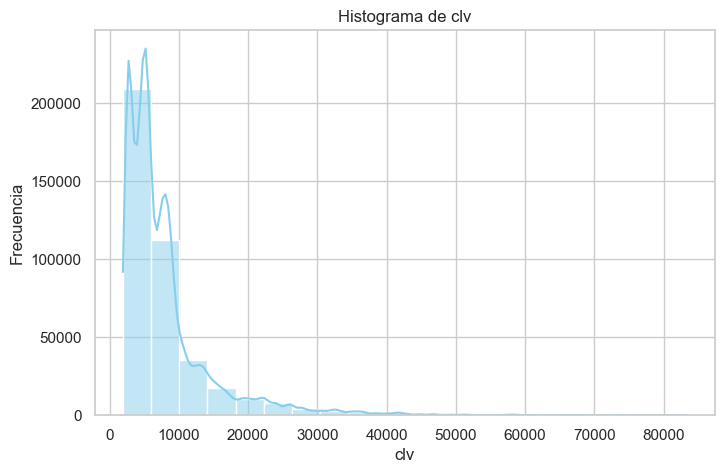

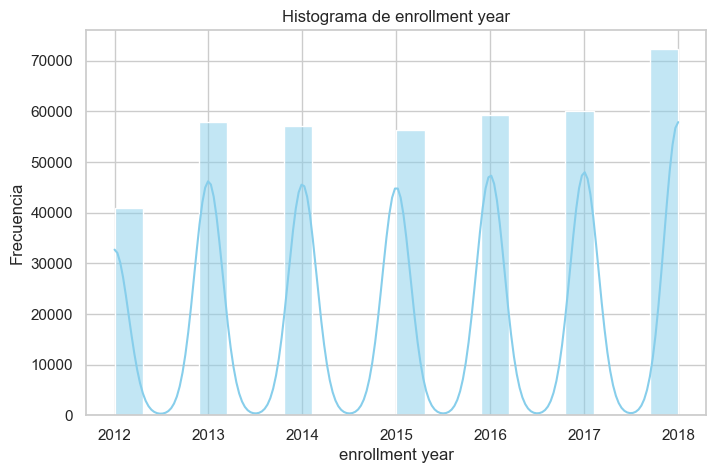

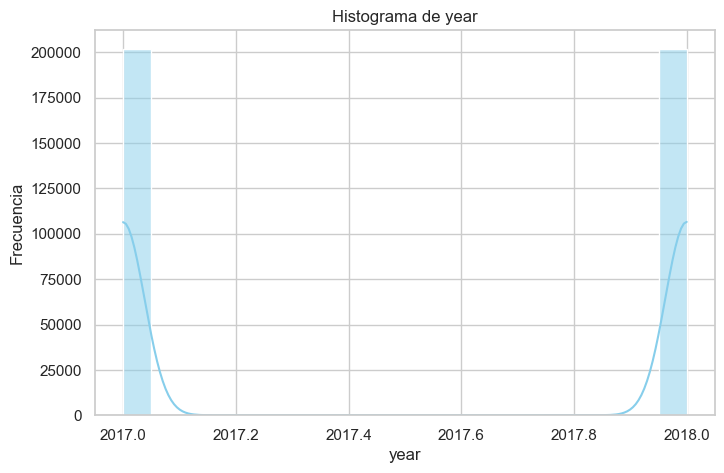

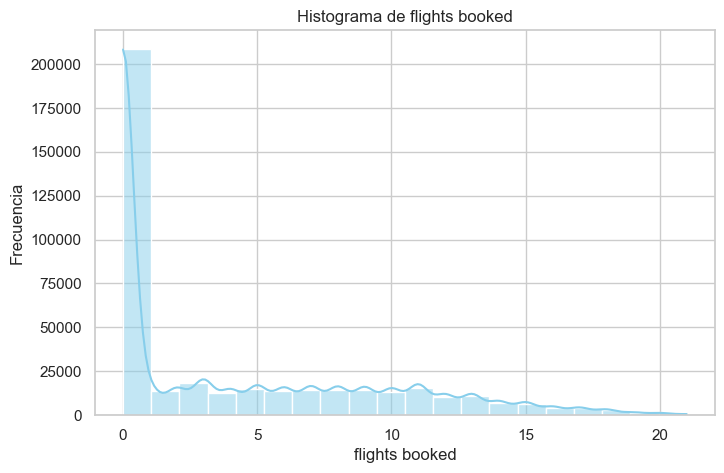

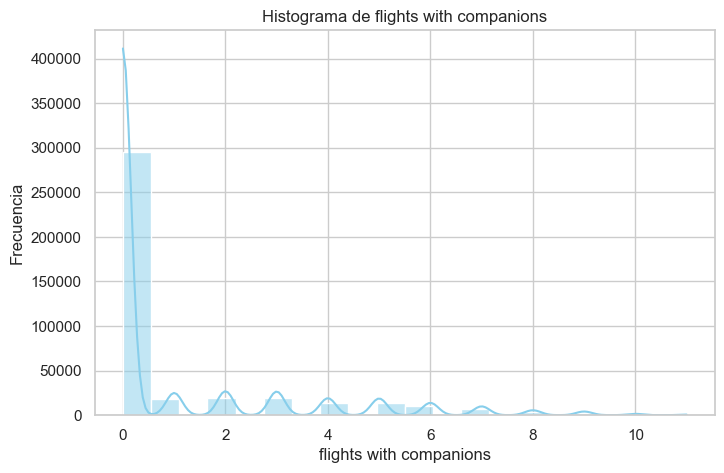

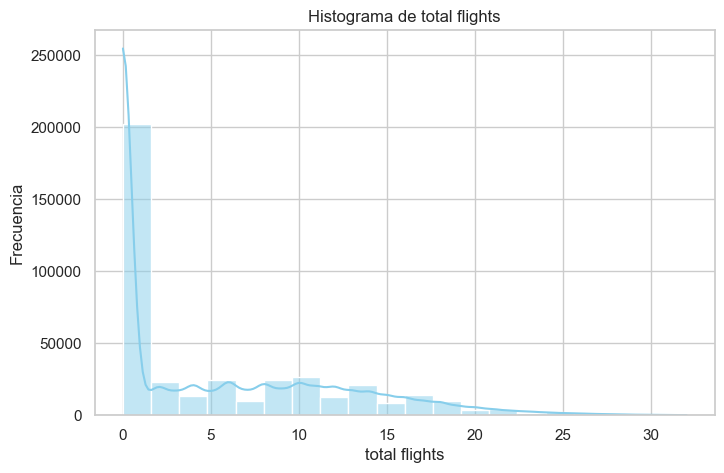

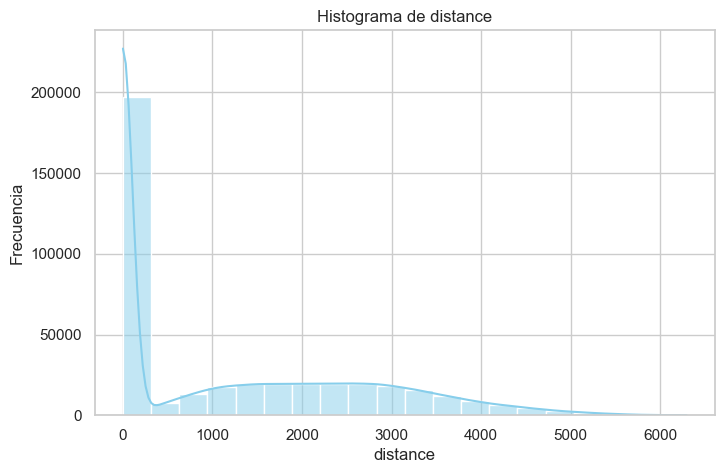

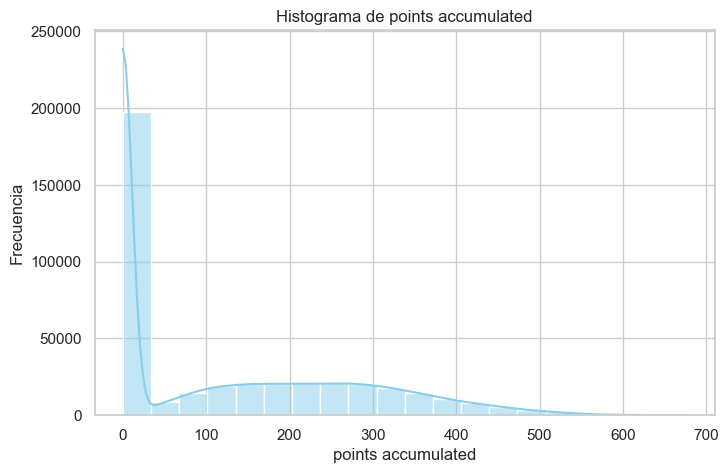

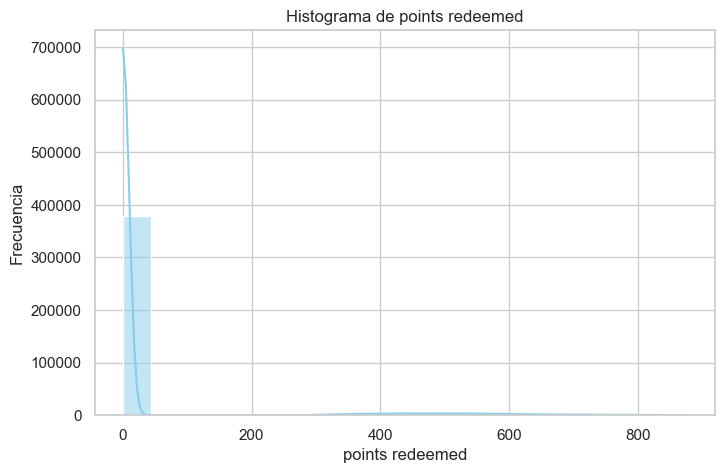

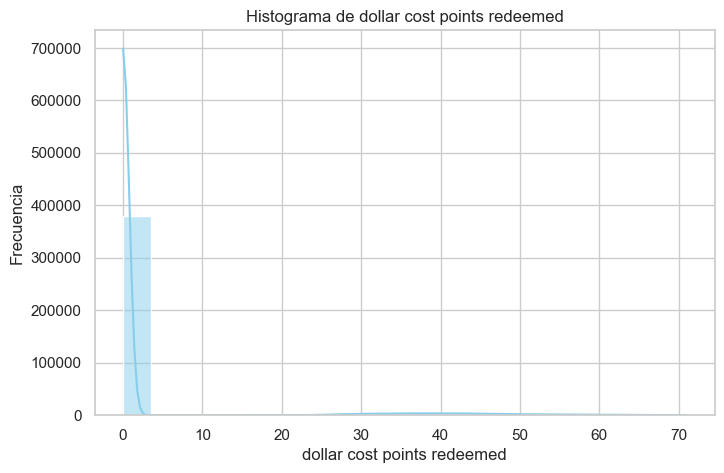

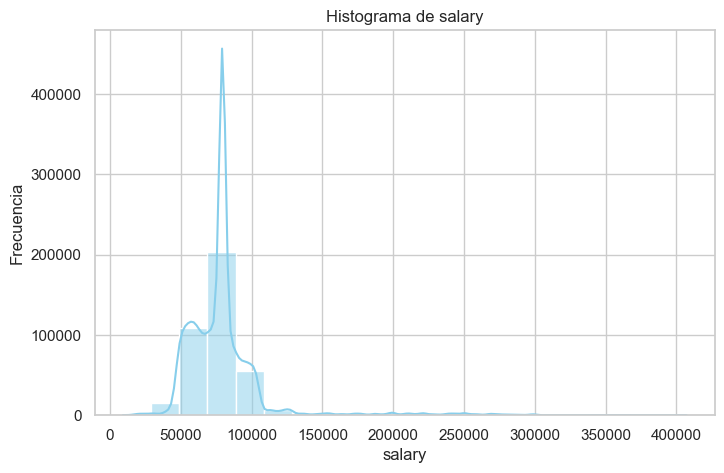

In [323]:
# Histogramas

numeric_columns = df_limpio.select_dtypes(include='number').columns.drop('loyalty number')

# Crear histogramas para cada variable numérica
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_limpio[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

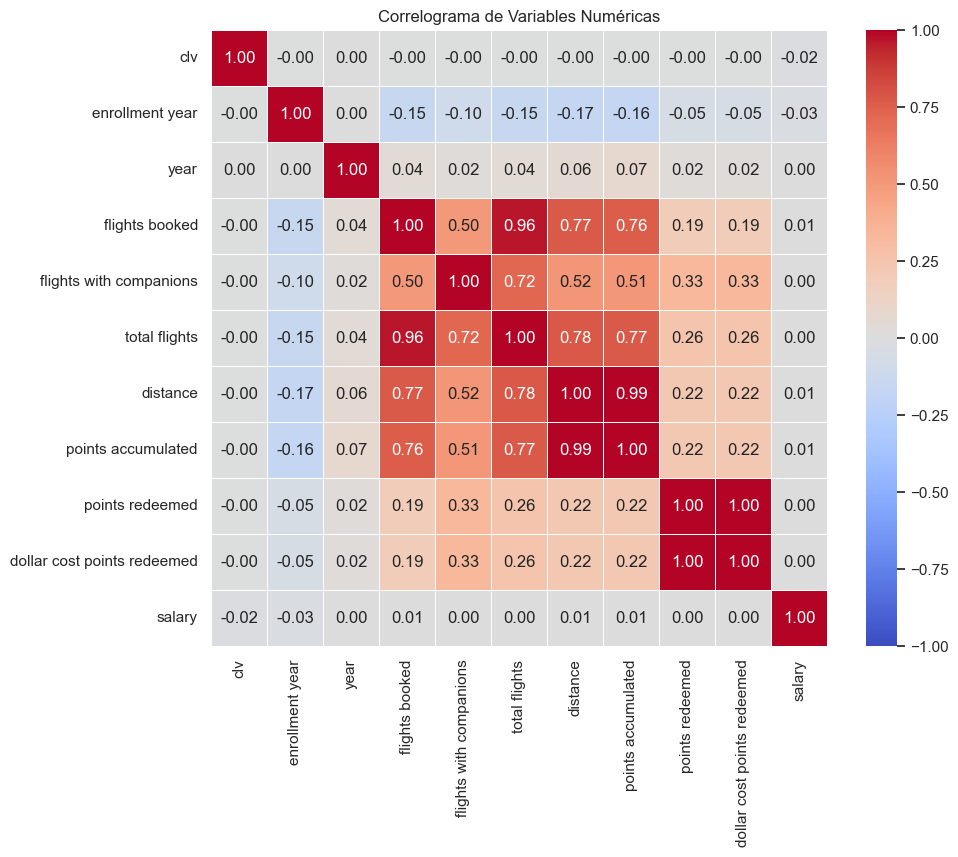

In [324]:
# Calcular matriz de correlación
correlation_matrix = df_limpio[numeric_columns].corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el correlograma usando seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, fmt='.2f', linewidths=.5)

# Añadir título
plt.title('Correlograma de Variables Numéricas')

# Mostrar el correlograma
plt.show()

Las variables dollar cost redeemed y point redeemd esta completamente correlacionadas  puede que se deba a un es la tranasformacion de la otra, por lo que se deberia considerar eliminar una de ellas
Tambien esta relacionadas de forma directa distance con points accumulate y total flights con total booked

#### B) variables Categoricas

In [325]:
# Seleccionar todas las variables categóricas
categorical_columns = df_limpio.select_dtypes(include=['object', 'category']).columns.tolist()

# Mostrar las variables categóricas seleccionadas
print("Variables categóricas seleccionadas:")
print(categorical_columns)

Variables categóricas seleccionadas:
['province', 'city', 'postal code', 'gender', 'education', 'marital status', 'loyalty card', 'enrollment type', 'enrollment month', 'cancellation year', 'cancellation month', 'month']


In [326]:
# Mostrar los valores únicos y sus frecuencias para cada variable categórica
for col in categorical_columns:
    print(f"Valores únicos de {col}: {df_limpio[col].unique()}")
    print(f"Frecuencia de cada valor en {col}:\n{df_limpio[col].value_counts()}\n")

Valores únicos de province: ['alberta' 'ontario' 'british columbia' 'saskatchewan' 'quebec'
 'newfoundland' 'manitoba' 'new brunswick' 'nova scotia'
 'prince edward island' 'yukon']
Frecuencia de cada valor en province:
province
ontario                 130258
british columbia        106442
quebec                   79573
alberta                  23360
manitoba                 15900
new brunswick            15352
nova scotia              12507
saskatchewan              9861
newfoundland              6244
yukon                     2679
prince edward island      1584
Name: count, dtype: int64

Valores únicos de city: ['edmonton' 'toronto' 'dawson creek' 'vancouver' 'regina' 'montreal'
 'sudbury' 'quebec city' 'peace river' "st. john's" 'tremblant' 'ottawa'
 'trenton' 'winnipeg' 'thunder bay' 'west vancouver' 'fredericton'
 'london' 'halifax' 'moncton' 'banff' 'kingston' 'whistler'
 'charlottetown' 'hull' 'victoria' 'calgary' 'kelowna' 'whitehorse']
Frecuencia de cada valor en city:
city
to

In [327]:
# Crear tabla de contingencia entre 'year' y 'gender'
contingency_table = pd.crosstab(df_limpio['year'], df_limpio['gender'], margins=True, margins_name='Total')

# Mostrar la tabla de contingencia
print("Tabla de contingencia para year y gender:")
print(contingency_table)

Tabla de contingencia para year y gender:
gender  female    male   Total
year                          
2017    101334  100404  201738
2018    101423  100599  202022
Total   202757  201003  403760


In [328]:
# Crear tablas de contingencia para 'year' con todas las variables numéricas
for col in numeric_columns:
    contingency_table = pd.crosstab(df_limpio['year'], df_limpio[col], margins=True, margins_name='Total')
    print(f"\nTabla de contingencia para year y {col}:")
    print(contingency_table)
    print("\n----------------------------------------\n")



Tabla de contingencia para year y clv:
clv    1898.01  1898.68  1904.0  1918.12  1940.98  1994.77  2004.35  2009.77  \
year                                                                           
2017        24       24      24       24       24       24      144       24   
2018        24       24      28       30       24       24      144       24   
Total       48       48      52       54       48       48      288       48   

clv    2030.78  2034.99  2050.62  2063.39  2064.46  2064.7  2086.61  2089.34  \
year                                                                           
2017        24       24       24       24       24      24       24       24   
2018        24       24       24       24       24      24       24       24   
Total       48       48       48       48       48      48       48       48   

clv    2108.49  2113.86  2114.74  2117.99  2119.89  2121.31  2121.65  2124.17  \
year                                                                         

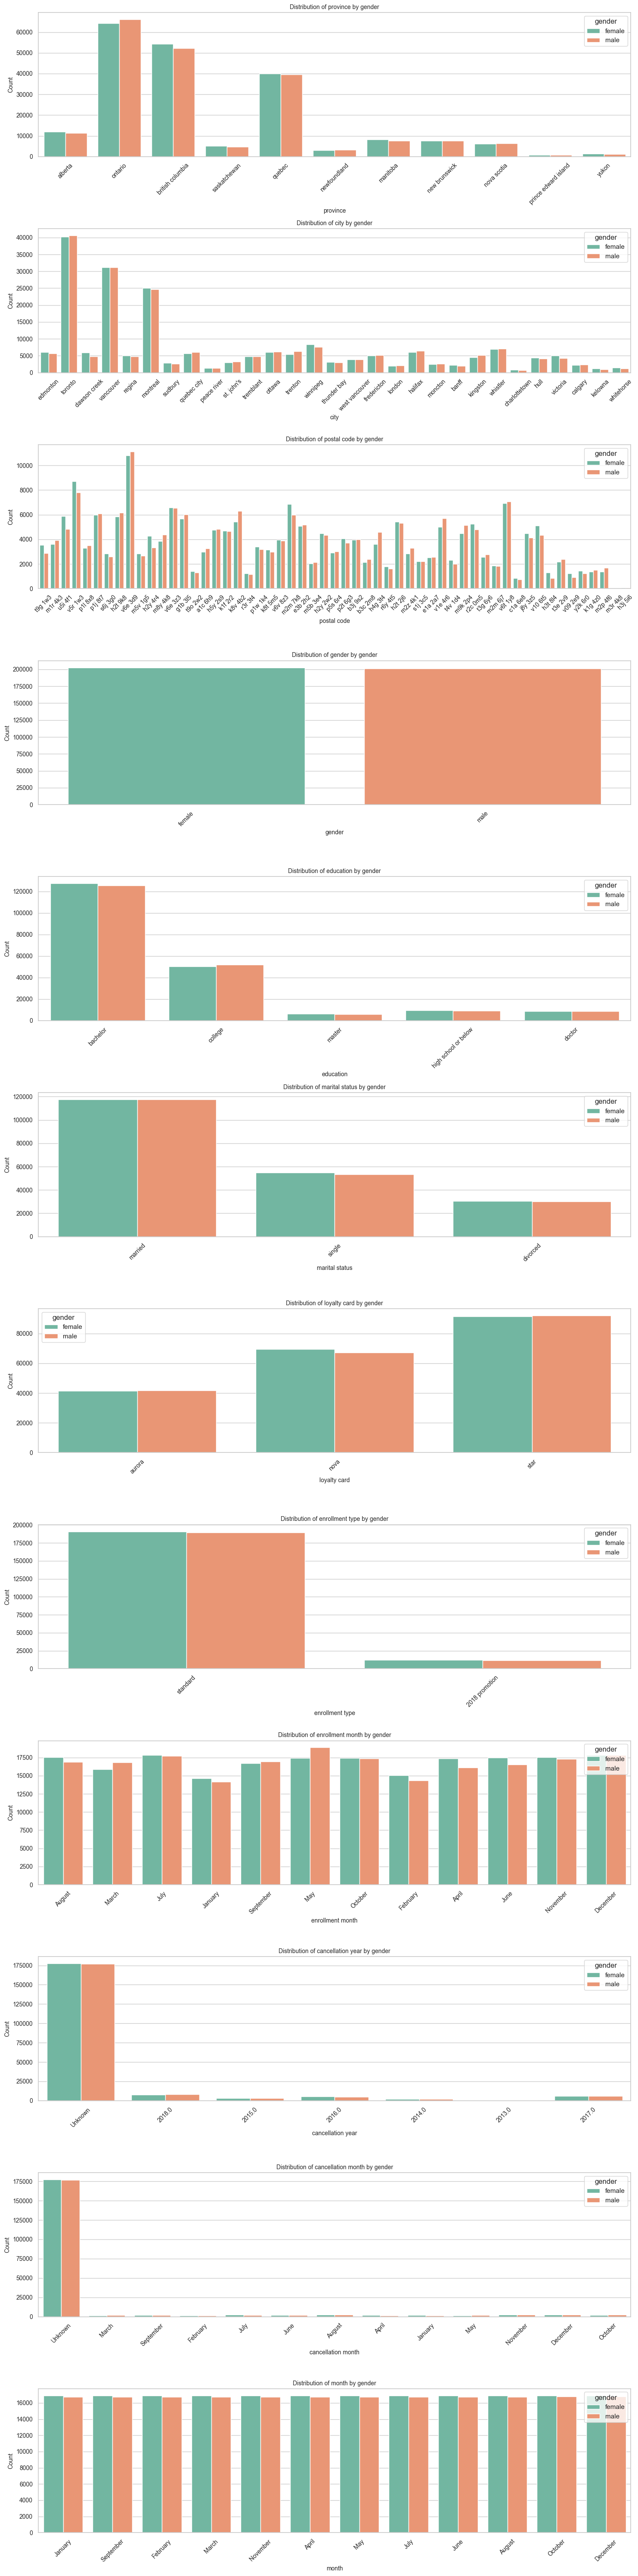

In [329]:
# Seleccionar todas las variables categóricas
categorical_columns = df_limpio.select_dtypes(include='object').columns

# Configurar el tamaño de la figura y la disposición de los subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(15, 5 * len(categorical_columns)))

# Ajuste del tamaño de la letra
font_size = 10

# Iterar sobre cada variable categórica y crear un barplot por género
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, hue='gender', data=df_limpio, palette='Set2', ax=axes[i])
    axes[i].set_xlabel(col, fontsize=font_size)
    axes[i].set_ylabel('Count', fontsize=font_size)
    axes[i].set_title(f'Distribution of {col} by gender', fontsize=font_size)
    axes[i].tick_params(axis='x', rotation=45, labelsize=font_size)  # Girar las etiquetas del eje x para una mejor legibilidad
    axes[i].tick_params(axis='y', labelsize=font_size)  # Ajustar el tamaño de la letra del eje y

# Ajustar el espacio entre subplots para evitar superposiciones
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Aumentar el espacio vertical entre subplots

# Mostrar los gráficos
plt.show()


# Fase 2. Visualización

## 2.1 ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

### 2.1.1 Analisis Numerico

In [330]:
# Agrupamos Df por  'month' y sumamos  'flights booked' para obtener el total de vuelos reservados por cada mes.
flights_by_month = df_limpio.groupby('month')['flights booked'].sum()

# Ordenar los meses reindexando por orden cronologico
flights_by_month = flights_by_month.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

print("Distribución de la cantidad de vuelos reservados por mes:")
print(flights_by_month)

Distribución de la cantidad de vuelos reservados por mes:
month
January       96936
February      96334
March        131199
April        112511
May          142170
June         173242
July         193431
August       169204
September    136379
October      129461
November     122250
December     166047
Name: flights booked, dtype: int64


In [331]:
#Media de vuelos mensual
#Agurpamos por mes y calculamos la media de vuelos
flights_mean_by_month = df_limpio.groupby('month')['flights booked'].mean() #

mes_con_mas_vuelos = flights_mean_by_month.idxmax()
max_vuelos = flights_mean_by_month.max()

max_vuelos_rounded = round(max_vuelos, 2)  # Redondear a 2 decimales

print("\nMes con más vuelos:")
print(f"{mes_con_mas_vuelos} con {max_vuelos_rounded} vuelos en promedio.")


Mes con más vuelos:
July con 5.75 vuelos en promedio.


Los datos muestran que a nivel general los meses de verano son aquellos donde más número de vuelos se reservan siendo el mes de julio el que mas vuelos en promedio tiene reservados

### 2.1.2 Analisis Gráfico

- Realizamos un **lineplot**.
- **Lineplot** se utiliza para visualizar datos que están organizados en series temporales o en secuencias ordenadas  
- Hemos creado 2 lineplot diferente un a nivel general y otro a por años 

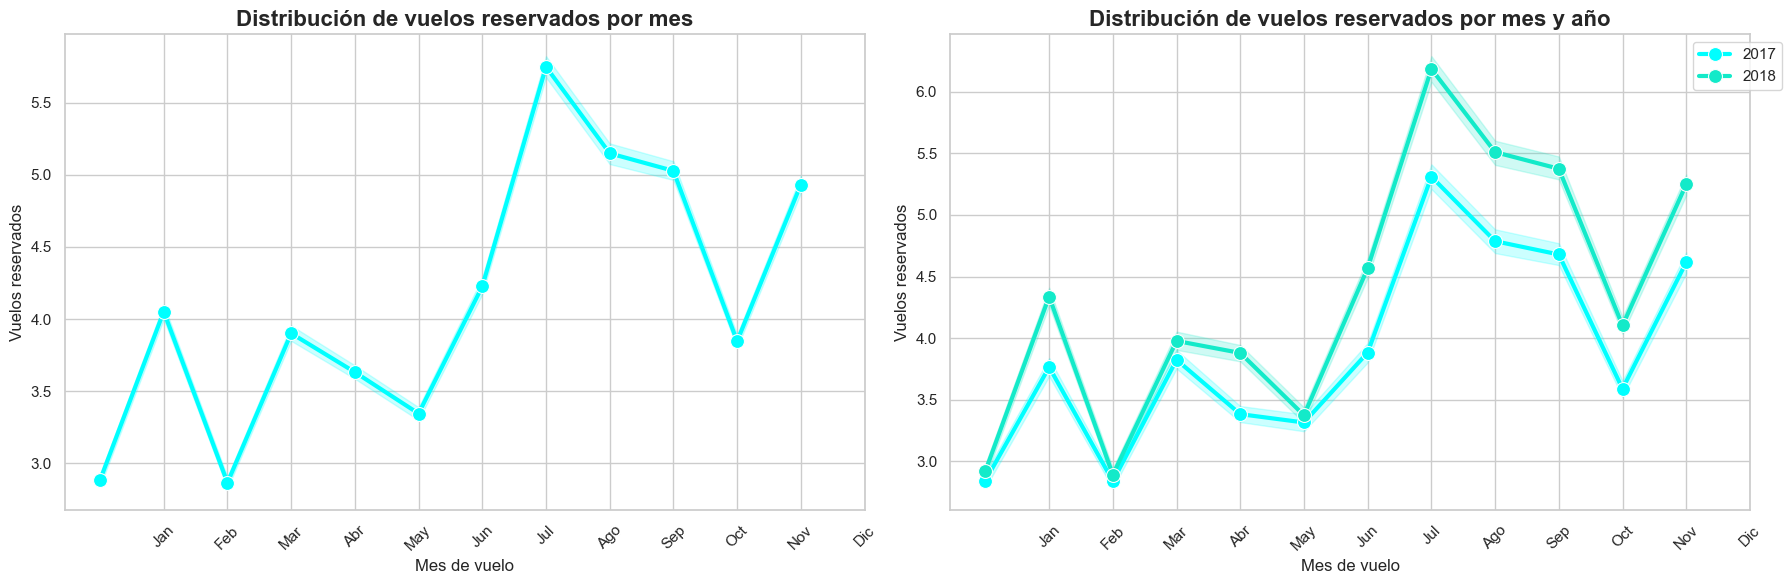

In [332]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Primer gráfico: Distribución de vuelos reservados por mes
sns.lineplot(x="month", y="flights booked",
             data=df_limpio,
             color="#00ffff",
             marker="o",
             markersize=10,
             linewidth=3,
             ax=ax1)

ax1.set_title('Distribución de vuelos reservados por mes', fontsize=16, fontweight="bold")
ax1.set_xlabel("Mes de vuelo", fontsize=12)
ax1.set_ylabel("Vuelos reservados", fontsize=12)
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(meses, rotation=45)

# Segundo gráfico: Distribución de vuelos reservados por mes y año
sns.lineplot(x="month", y="flights booked",
             data=df_limpio,
             hue="year",
             marker="o",
             markersize=10,
             linewidth=3,
             palette=["#00ffff", "#13eac9"],
             ax=ax2)

ax2.set_title('Distribución de vuelos reservados por mes y año', fontsize=16, fontweight="bold")
ax2.set_xlabel("Mes de vuelo", fontsize=12)
ax2.set_ylabel("Vuelos reservados", fontsize=12)
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(meses, rotation=45)
ax2.legend(bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()


In [ ]:
Según podemos ver con la primera gráfica, los vuelos que se reservan por cada mes son más en la temporada de verano. Aunque tiene una subida en el mes de febrero, en marzo vuelve a bajar para continuar la escalada de reservas ahta llegar a su pico en el mes de julio. Vuelven a crecer las reservas a partir de octubre, hacia el mes de noviembre.

En la segunda gráfica podemos ver que hay poca variación con la explicación anterior, ambos años siguen la msima tendencia de alza de reservas durante los meses de verano y las mismas bajas en los mismos meses. Lo que sí podemos comprobar es que en el año 2018 hay un aumento de las reservas en comparación con el año anterior.

## 2.2 ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

### 2.2.1 Medidas de Correlacion

- **Coeficiente de correlacion**. Mide relación lineal entre dos variables continuas y su intensidad.
- **Coeficiente de Correlación de Spearman** .  Versión no paramétrica de la correlación de Pearson basada en los rangos de los datos.
- **Covarianza**. Indica la dirección de la relación lineal entre dos variables.   

In [333]:
#Coeficiente de correlacion Pearson

correlation = df_limpio['distance'].corr(df_limpio['points accumulated'])

print(f"Coeficiente de correlación de Pearson: {correlation}")

Coeficiente de correlación de Pearson: 0.9945458005650538


In [334]:
#Coeficiente de correlacion  Spearman 
correlation_spearman, p_value = spearmanr(df_limpio['distance'], df_limpio['points accumulated'])

print(f"Coeficiente de correlación de Spearman: {correlation_spearman}")


Coeficiente de correlación de Spearman: 0.9980424046113834


In [335]:
# Covarianza
covariance = df_limpio['distance'].cov(df_limpio['points accumulated'])

print(f"Covarianza: {covariance}")

Covarianza: 209229.33595001954


- Los valores  sugieren que las dos variables están altamente correlacionadas de manera positiva, tanto en términos de una relación lineal (Pearson) como en términos de su ordenación general (Spearman). <p>
- Además, la covarianza positiva indica que las variables tienden a cambiar juntas en la misma dirección.<p>

### 2.2.2 Análisis Gráfico

Vamos a realizar un **scatterplot** que es un gráfico que mide la relación entre las variables donde punto representa una observación  un vuelo con su respectiva distancia y puntos acumulados.

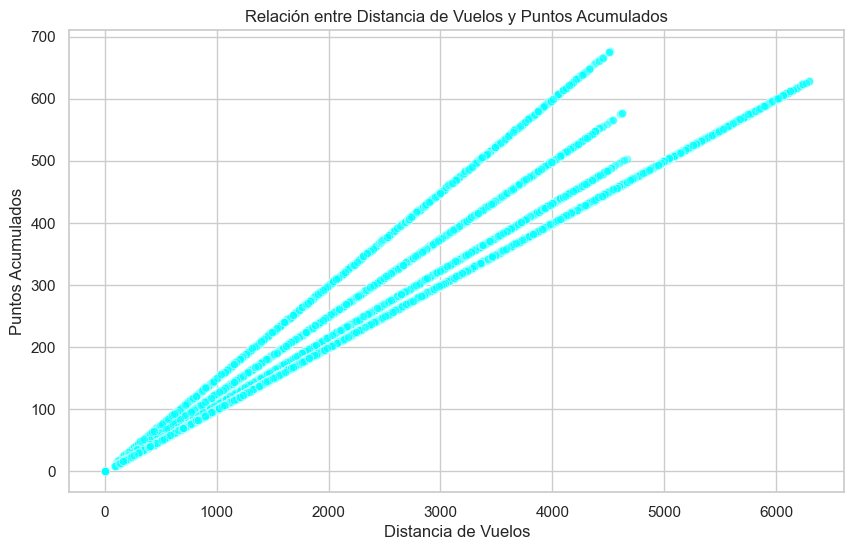

In [336]:
# Configurar tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear scatter plot
sns.scatterplot(x='distance', y='points accumulated',  color="#00ffff",data=df_limpio, alpha=0.5)
plt.title('Relación entre Distancia de Vuelos y Puntos Acumulados')
plt.xlabel('Distancia de Vuelos')
plt.ylabel('Puntos Acumulados')
plt.grid(True)
plt.show()

Existe una relación directa y positiva entre la distancia de vuelos y los puntos acumulados por cliente. Esto quiere decir que a cuanta más distancia viajada más puntos se acumulan.

## 2.3 ¿Cuál es la distribución de los clientes por provincia o estado?

### 2.3.1 Tabla de Contigencia

Realizamos una tabla de frecuencias para saber cual es la distribución por cada una de las provincias

In [337]:
# Crear tabla de frecuencias

tabla_frecuencias = pd.crosstab(df_limpio['province'], columns='total')

# Calcular porcentajes
total_clientes = tabla_frecuencias['total'].sum()
tabla_frecuencias['porcentaje'] = tabla_frecuencias['total'] / total_clientes * 100

# Mostrar tabla de contingencia con porcentajes
print(tabla_frecuencias)

col_0                  total  porcentaje
province                                
alberta                23360    5.785615
british columbia      106442   26.362691
manitoba               15900    3.937983
new brunswick          15352    3.802259
newfoundland            6244    1.546463
nova scotia            12507    3.097632
ontario               130258   32.261244
prince edward island    1584    0.392312
quebec                 79573   19.707995
saskatchewan            9861    2.442292
yukon                   2679    0.663513


### 2.3.2 Análisis Gráfico

Vamos a realizar un **countplot** un tipo de gráfico que se utiliza en visualización de datos para mostrar la frecuencia de observaciones en cada categoría de una variable categórica. 

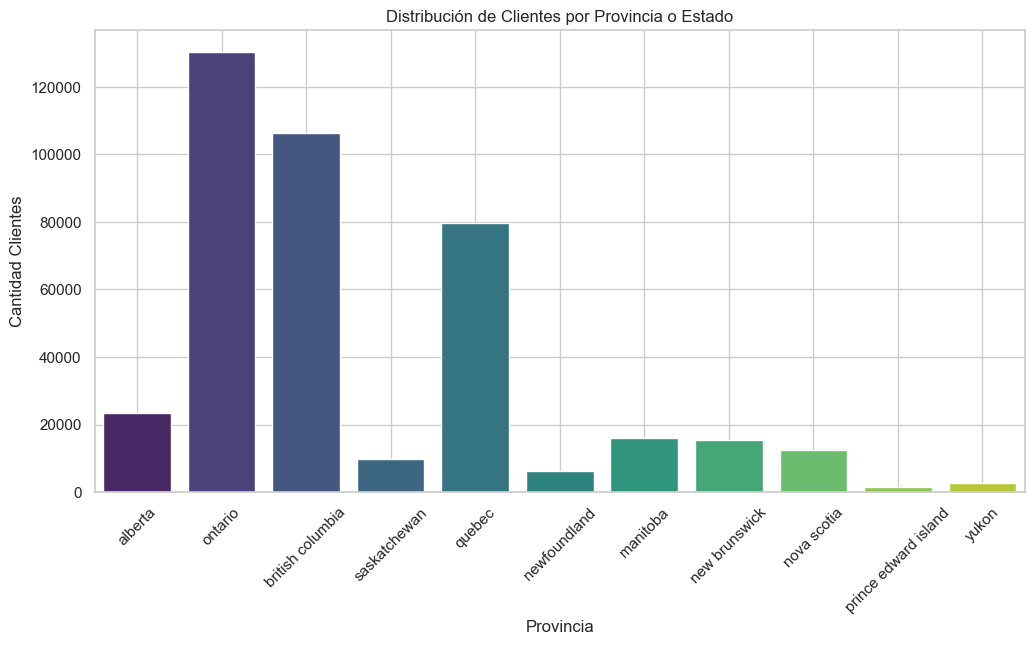

In [338]:

plt.figure(figsize=(12, 6))

sns.countplot(x='province', data=df_limpio, palette='viridis')
plt.title('Distribución de Clientes por Provincia o Estado')
plt.xlabel("Provincia", fontsize=12)
plt.ylabel("Cantidad Clientes", fontsize=12);
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

Lo que podemos observar a través de esta gráfica es que hay más clientes en Ontario, british columbia y quebec,que esta relacionado de forma directa con la distribución poblacional de Cánada.</p>
Sin embargo un dato que parece anómalo a primera vista es Quebec que es la provincia más poblada del país y se mantiene con 3º puesto en número de clientes.

## 2.4  ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

### 2.4.1 Análisis Gráfico

In [339]:
promedio_general = df_limpio['salary'].mean() # Calculamos el salario promedio
print("\nAnálisis estadístico adicional:")
print("- Salario promedio general: {:.2f}".format(promedio_general))
print("- Desviación estándar del salario: {:.2f}".format(df_limpio['salary'].std())) # Calculamos la desviacion tipica
print("- Resumen de salario por nivel educativo:")
print(df_limpio.groupby('education')['salary'].describe()) #Mediante group by en education calculamos las estadisticas descriptivas para los salarios agrupados por nivel educativo




Análisis estadístico adicional:
- Salario promedio general: 79371.73
- Desviación estándar del salario: 30008.34
- Resumen de salario por nivel educativo:
                         count           mean           std           min  \
education                                                                   
bachelor              252567.0   72599.080913  1.666768e+04   9081.000000   
college               102260.0   79371.732902  1.455199e-11  79371.732902   
doctor                 17731.0  178403.675202  7.038005e+04  48109.000000   
high school or below   18915.0   61146.378165  1.210535e+04  21853.000000   
master                 12287.0  103734.523724  1.751849e+04  56414.000000   

                                25%            50%            75%  \
education                                                           
bachelor               58711.000000   71972.000000   85866.000000   
college                79371.732902   79371.732902   79371.732902   
doctor                124407

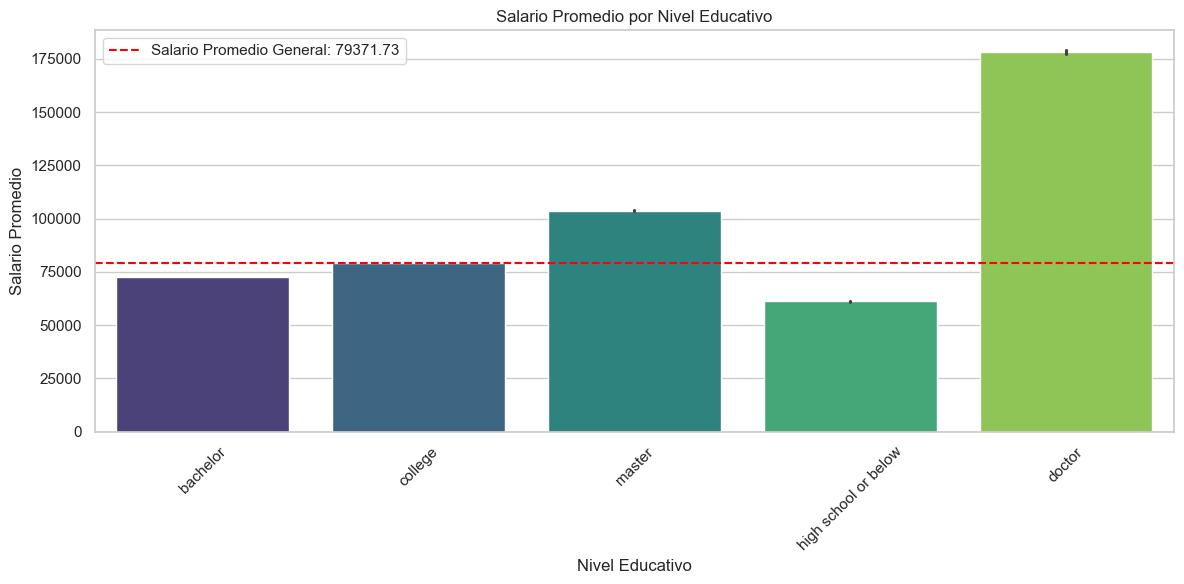

In [340]:

plt.figure(figsize=(12, 6))

# Crear el gráfico de barras
sns.barplot(x='education', y='salary', data=df_limpio, palette='viridis')

# Añadir línea para el salario promedio total
promedio_general = df_limpio['salary'].mean() # Calculamos el salario promedio
plt.axhline(promedio_general, color='red', linestyle='--', label=f'Salario Promedio General: {promedio_general:.2f}')

# Añadir etiquetas y título
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.title('Salario Promedio por Nivel Educativo')
plt.xticks(rotation=45)

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()




El salario promedio es de 79.371,73 y se puede obserar que el nivel educativo de doctor estar por encima del salario medio junto con el de master, mientras que los clasificados como colleges estan en la media de salario de la muestra

 Las personas con estudios básicos o secundarios no  llegan a un salario medio de entre de 79.371  mientras que en el caso de aquellos que son doctor  la cifra alcanzaría los 178403.675202

## 2.5.  ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

### 2.5.1 Análisis Númerico

In [341]:
# Contar el número de clientes por tipo de tarjeta de fidelidad
clientes_por_tarjeta = df_limpio['loyalty card'].value_counts()

# Calcular la proporción de clientes por tipo de tarjeta de fidelidad
proporcion_clientes = clientes_por_tarjeta / clientes_por_tarjeta.sum()

porcentaje_clientes = proporcion_clientes * 100
# Mostrar los resultados
print("Proporción de clientes por tipo de tarjeta de fidelidad:.2f}'")
print(porcentaje_clientes)

Proporción de clientes por tipo de tarjeta de fidelidad:.2f}'
loyalty card
star      45.508470
nova      33.902071
aurora    20.589459
Name: count, dtype: float64


### 2.5.2 Análisis Gráfico

Hemos usado un **pie chart** ya que nos permite visualizar porcentajes de datos catégoricos

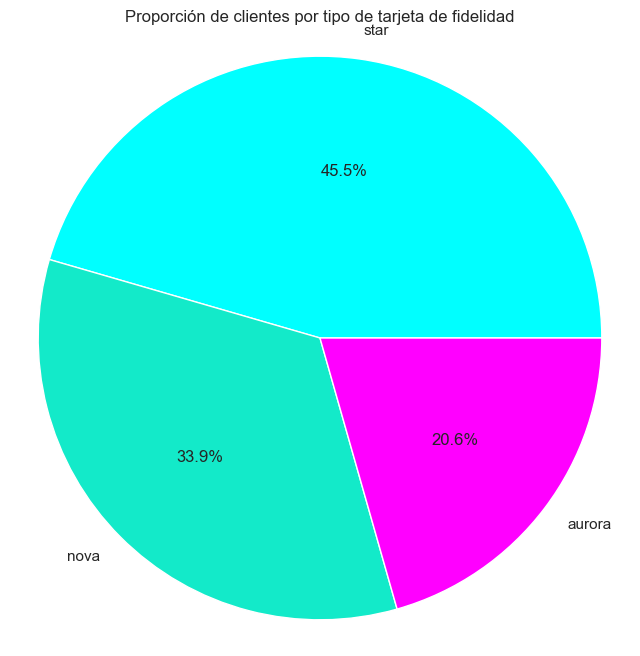

In [342]:
# Crear un gráfico de pie
plt.figure(figsize=(8, 8))
plt.pie(porcentaje_clientes, labels=porcentaje_clientes.index, autopct='%1.1f%%', colors=['#00ffff', '#13EAC9', '#FF00FF'])
plt.title('Proporción de clientes por tipo de tarjeta de fidelidad')
plt.axis('equal')  # Equal aspect ratio asegura que el gráfico sea un círculo en lugar de elipse

# Mostrar el gráfico
plt.show()


## 2.6.  ¿Cómo se distribuyen los clientes según su estado civil y género?

###  2.6.1  Tabla de Contingencias

Vamos a realizar una **tabla de contingencias** ya que necesitamos saber la realación entre dos variables categóricas y sus frecuencias

In [343]:
# Crear la tabla de contingencia
tabla_contingencia = pd.crosstab(df_limpio['marital status'], df_limpio['gender'])

# Calcular los porcentajes por fila
tabla_contingencia_pct = tabla_contingencia.div(tabla_contingencia.sum(axis=1), axis=0) * 100 #dividimos cada elemento de tabla_contingencia por los valores  resultante de tabla_contingencia.sum(.

# Mostrar la tabla de contingencia con frecuencias y porcentajes
print("Tabla de contingencia con frecuencias:")
print(tabla_contingencia)

print("\nTabla de contingencia con porcentajes:")
print(tabla_contingencia_pct)


Tabla de contingencia con frecuencias:
gender          female    male
marital status                
divorced         30634   30128
married         117363  117482
single           54760   53393

Tabla de contingencia con porcentajes:
gender             female       male
marital status                      
divorced        50.416379  49.583621
married         49.974664  50.025336
single          50.631975  49.368025


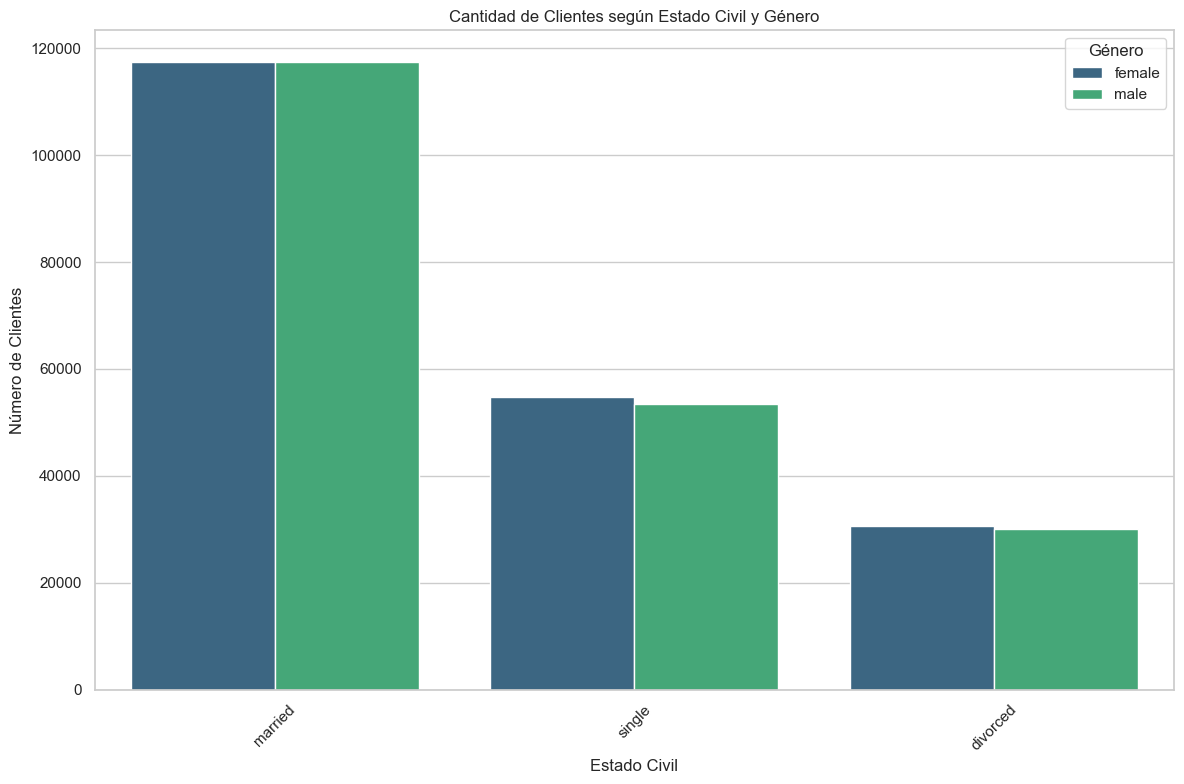

In [344]:
# Crear el barplot
plt.figure(figsize=(12, 8))
sns.countplot(x='marital status', hue='gender', data=df_limpio, palette='viridis')

# Títulos y etiquetas
plt.title('Cantidad de Clientes según Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.legend(title='Género')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


- Existe la misma cantidad de hombres y mujeres casados, en cada uno de los segmentos
- Los casados son el mayor bloque de clientes dentro de la base de estudio.
- 

# Fase 3.  Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

##  3.1  Preparación de Datos

In [345]:
subset=df_limpio[['flights booked', 'education']] # Filtramos el DF para incluir únicamente las columnas relevantes
subset.head()


,flights booked,education
0,3,bachelor
1,10,college
2,6,college
3,0,bachelor
4,0,bachelor


In [346]:
unique_flight_booked = subset['flights booked'].unique() # Valores únicos de la columna 'flight booked'
unique_education = subset['education'].unique() # Valores únicos de la columna 'education'
print("Valores únicos de 'flight booked':", unique_flight_booked)
print("Valores únicos de 'education':", unique_education)

Valores únicos de 'flight booked': [ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]
Valores únicos de 'education': ['bachelor' 'college' 'master' 'high school or below' 'doctor']


##  3.2  Análisis Descriptivo

In [348]:
#Agrupamos los datos por 'Education(gruposde educacion)' y seleccionmos  'Flights Booked' para calcular las estadísticas descriptivas, del subset que 
education_groups = subset.groupby('education')['flights booked'] 

# Aplicar la función describe() para obtener estadísticas descriptivas
descriptive_stats = education_groups.describe().T

# Mostrar los resultados
descriptive_stats


education,bachelor,college,doctor,high school or below,master
count,252567.000000,102260.000000,17731.000000,18915.000000,12287.000000
mean,4.110288,4.169744,4.175512,4.176209,4.200700
std,5.221671,5.246040,5.256971,5.239267,5.213956
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000
max,21.000000,21.000000,21.000000,21.000000,21.000000


- Estos valores sugieren que, en promedio, las personas han reservado 4 viajes independientemente del grado educativo.
- Por lo que respecta al análisis de la desviación típica son similares en todas las categorías, lo que indica que la dispersión es muy similar en los diferentes niveles educativos, independientemente de su nivel.
- Mínimo: 0 vuelos (indicando que puede haber categorías sin vuelos registrados).
- Máximo: 21 vuelos (indicando el máximo número de vuelos registrados en una categoría).
- A primera vista no hay ninguna diferencia en los grupos estudiados.



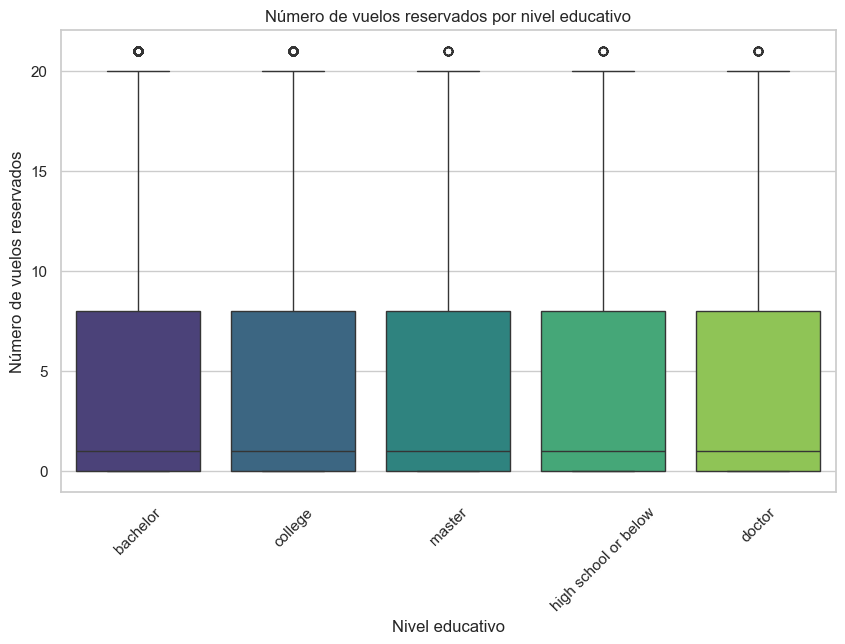

In [349]:
# Crear un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='flights booked', data=subset, palette='viridis')
plt.title('Número de vuelos reservados por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Número de vuelos reservados')
plt.xticks(rotation=45)
plt.show()

No hay ninguna diferencia a nivel educativo si lo vemos en el gráfico

##  3.2  Prueba Estadísticas

Se va a realizar un A/B testing para evaluar y comparar si existe una diferencia signficativa entre los grupos
Pero antes hay que agrupar los grupos educativos en 2 segmentos.



### 3.2.1 Agrupación y creación de los nuevos grupos educativos. Analisis Descriptivos

In [350]:
# creamos la función para agrupar los niveles educativos
def group_education(education_level):
    if education_level in ['bachelor', 'collegue', 'doctor', 'master']:
        return 'superior'
    else:
        return 'basico'

In [351]:
subset['education_group'] = subset['education'].apply(group_education)

In [352]:
print(subset.head(3))


   flights booked education education_group
0               3  bachelor        superior
1              10   college          basico
2               6   college          basico


In [353]:
subset.shape

(403760, 3)

In [354]:
subset.columns

Index(['flights booked', 'education', 'education_group'], dtype='object')

In [355]:
descriptivos_educacion = subset.groupby('education_group')['flights booked'].describe()

(descriptivos_educacion)

,count,mean,std,min,25%,50%,75%,max
education_group,,,,,,,,
basico,121175.0,4.170753,5.244962,0.0,0.0,1.0,8.0,21.0
superior,282585.0,4.118311,5.223592,0.0,0.0,1.0,8.0,21.0


- Estos valores sugieren que, en promedio, las personas han reservado 4 viajes independientemente del grado educativo.
- Por lo que respecta al análisis de la desviación típica son similares en todas las categorías, lo que indica que la dispersión es muy similar en los diferentes niveles educativos, independientemente de su nivel.
- Mínimo: 0 vuelos (indicando que puede haber categorías sin vuelos registrados).
- Máximo: 21 vuelos (indicando el máximo número de vuelos registrados en una categoría).
- A primera vista no hay ninguna diferencia en los grupos estudiados.

### 3.2.2 Planteamiento de las Hipótesis & Grupos 

- **Ho** (Hipótesis Nula). No hay una diferencia significativa entre los niveles y los grupos educativos.
- **H1** (Hipótesis Alernativa). Hay una diferencia significativa entre los niveles y los grupos educativos.
- **Grupo Control**: Educación Superior. 
- **Grupo Test**: Educación Básica.

### 3.2.3 Pruebas Estadisticas

#### A) Pruebas Parametricas


Hemos realizado primero las pruebas paramétrica suponiendo que los grupos tienen las siguientes caracteristicas


- Datos normales:  Los datos se distribuyen normalmente. 
- Homogenidad de las varianzas


In [356]:
# Filtramos el subset para selecionar las muestras de basico y superior
grupo_basico = subset[subset['education_group'] == 'basico']['flights booked'].dropna()
grupo_superior = subset[subset['education_group'] == 'superior']['flights booked'].dropna()

In [357]:
# T-Student

# Test de Student para comparar las dos grupos
t_statistic, p_value = stats.ttest_ind(grupo_basico, grupo_superior) 

# Imprimes el resultado del test
print(f"Resultado del test de Student:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretación del resultado
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print(" Se rechaza Ho.Hay diferencias significativas en el número de vuelos reservados entre los grupos basico y superior.")
else:
    print("Se acepta Ho .No hay diferencias significativas en el número de vuelos reservados entre los grupos basico y superior.")


Resultado del test de Student:
T-statistic: 2.9200720642801534
P-value: 0.00349969795207832
 Se rechaza Ho.Hay diferencias significativas en el número de vuelos reservados entre los grupos basico y superior.


El valor p obtenido (0.0035) es bajo, lo que sugiere que la diferencia en el número de vuelos reservados entre los grupos básico y superior es estadísticamente significativa. 
Esto indica que, bajo la suposición de normalidad de los datos, la probabilidad de obtener una diferencia tan grande o mayor en los datos debido al azar es muy baja.

Para validar la suposición de normalidad, se va a realizar  Shapiro-Wilk o la prueba de Kolmogorov-Smirnov y tambien se va explorar la posibilida de las pruebas no parametricas como  Mann-Withney

In [358]:
## Prueba Z. 
## Al tener un tamaño muestral muy grande conviene usar la prueba Z en lugar de la t-student
# Calcular las medias y desviaciones estándar de cada grupo
mean_grupo_basico = np.mean(grupo_basico)
mean_grupo_superior = np.mean(grupo_superior)
std_grupo_basico = np.std(grupo_basico, ddof=1)  # ddof=1 para usar n-1 en el cálculo de la desviación estándar de cada muestra
std_grupo_superior = np.std(grupo_superior, ddof=1)

# Calcular el tamaño de muestra 
n_grupo_basico = len(grupo_basico)
n_grupo_superior = len(grupo_superior)

# Calculo del error estandar de la diferencia de las medias entre los 2 grupos
# Es la suma raiz de la suma de los cuadrados de las desviaciones estandar de los grupos divididos por el tamaño de cada grupo
stderr_diff_means = np.sqrt((std_grupo_basico**2 / n_grupo_basico) + (std_grupo_superior**2 / n_grupo_superior))

# Calcular el valor Z
# La diferencia entre la media de los grupos dividio por el error estandar de la medias
z_value = (mean_grupo_basico - mean_grupo_superior) / stderr_diff_means

# Calcular el valor p usando una prueba Z de dos colas

p_value = 2 * (1 - stats.norm.cdf(np.abs(z_value)))  

# Imprimir resultados
print(f"Valor Z: {z_value}")
print(f"P-value: {p_value}")

# Interpretación del resultado
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza Ho.Hay diferencias significativas en el número de vuelos reservados entre los grupos basico y superior..")
else:
    print("Se acepta Ho .No hay diferencias significativas en el número de vuelos reservados entre los grupos basico y superior")


Valor Z: 2.9153100033342065
P-value: 0.003553353909491852
Se rechaza Ho.Hay diferencias significativas en el número de vuelos reservados entre los grupos basico y superior..


En términos de normalidad ,los datos de la z los datos p-value sugiere que la   que la diferencia encontrada entre las muestras no se debe a variaciones aleatorias inherentes a la distribución normal. </p>
 Los resultados de  Z sugieren que, bajo la suposición de normalidad de los datos, la diferencia entre las muestras es estadísticamente significativa. </p>
 Pero necesitamos realizar  un Shapiro-Wilk para validar esa suposición antes de confiar completamente en los resultados de la prueba Z.</p>

In [359]:
## Shapiro-Wilk 
shapiro_grupo_basico = stats.shapiro(grupo_basico)
shapiro_grupo_superior = stats.shapiro(grupo_superior)

# Imprimimos los resultados del test de Shapiro-Wilk
print(f"Test de Shapiro-Wilk para el grupo Básico: Estadístico = {shapiro_grupo_basico.statistic}, p-valor = {shapiro_grupo_basico.pvalue}")
print(f"Test de Shapiro-Wilk para el grupo Superior: Estadístico = {shapiro_grupo_superior.statistic}, p-valor = {shapiro_grupo_superior.pvalue}")

# Interpretación de los resultados
if shapiro_grupo_basico.pvalue > 0.05:
    print("El grupo Básico sigue una distribución normal.")
else:
    print("El grupo Básico no sigue una distribución normal.")

if shapiro_grupo_superior.pvalue > 0.05:
    print("El grupo Superior sigue una distribución normal.")
else:
    print("El grupo Superior no sigue una distribución normal.")

Test de Shapiro-Wilk para el grupo Básico: Estadístico = 0.7910726594641948, p-valor = 5.1332536074711637e-138
Test de Shapiro-Wilk para el grupo Superior: Estadístico = 0.7878556212372553, p-valor = 1.6181720140769964e-157
El grupo Básico no sigue una distribución normal.
El grupo Superior no sigue una distribución normal.


Como el valor p-value es 0.05 rechazamos la Ho, es decir que  ninguno de los grupos sigue una distribución normal

Grupo Básico: No sigue una distribución normal.
Grupo Superior: No sigue una distribución normal.
Por lo tanto, la conclusión es que ninguno de los dos grupos sigue una distribución normal según el test de Shapiro-Wilk.

In [ ]:
# Homogenidad de las Varianzas

#Hipótesis nula (H0): Las varianzas de los dos grupos son iguales (homogeneidad de varianzas).
#Hipótesis alternativa (H1): Las varianzas de los dos grupos no son iguales (heterogeneidad de varianzas).

In [363]:
# Prueba de Levene


# Realizamos el test de Levene
statistic, p_value = levene(grupo_basico, grupo_superior)

# Imprimimos los resultados
print(f'Estadístico de Levene: {statistic}')
print(f'Valor p: {p_value}')

# Interpretamos los resultados
alpha = 0.05  # Nivel de significancia
if p_value > alpha:
    print('No hay suficiente evidencia para rechazar la hipótesis nula (homogeneidad de varianzas).')
else:
    print('Hay evidencia suficiente para rechazar la hipótesis nula (varianzas diferentes).')


Estadístico de Levene: 7.931372699306991
Valor p: 0.0048587279888045185
Hay evidencia suficiente para rechazar la hipótesis nula (varianzas diferentes).


Dado que el valor p es menor que 0.05, existe evidencia  para rechazar la hipótesis nula de igualdad de varianzas. Por lo tanto, podemos concluir que hay diferencias significativas en las varianzas de los grupos analizados.

En resumen, sí hay evidencia suficiente para afirmar que las varianzas son diferentes entre los grupos comparados, basándonos en el valor p obtenido del estadístico de Levene.

#### B) Pruebas No Parametricas

Tras rechazar la Ho nula de normalidad de shapiro-wilks vamos a realizar contrastes no paramétricos para comprobar si la existe una diferencia entre los grupos

In [ ]:
## Prueba Kolmogorov-Smirnov
##Prueba no paramétrica utilizada para  comparar dos muestras que  evalúa la hipótesis nula de que la muestra proviene de la misma distribución.


In [362]:

# Realizamos la prueba de Kolmogorov-Smirnov
ks_result = ks_2samp(grupo_basico, grupo_superior) 

# Imprimimos los resultados
print(f"Estadístico de K-S: {ks_result.statistic}")
print(f"p-value: {ks_result.pvalue}")

# Interpretación del resultado
if ks_result.pvalue < 0.05:
    print("Hay diferencias significativas en la distribución del número de vuelos reservados entre los niveles educativos 'básico' y 'superior'.")
else:
    print("No hay diferencias significativas en la distribución del número de vuelos reservados entre los niveles educativos 'básico' y 'superior'.")


Estadístico de K-S: 0.005044370293575295
p-value: 0.026616492085066
Hay diferencias significativas en la distribución del número de vuelos reservados entre los niveles educativos 'básico' y 'superior'.




El valor del Estadístico de K-S:  0.005044370293575295,  cuanto más pequeño sea este valor, más cercana es la distribución de la muestra a la normalidad ys ugiere que la distribución de la muestra es muy similar a una distribución normal

p-value: El valor de 0.026616492085066 es menor que un nivel de significancia,  wsto implica que hay evidencia suficiente para rechazar la hipótesis nula de que la muestra no sigue una distribución normal es decir  la muestra parece seguir una distribución normal, dado el nivel de significancia del 0.05.

En resumen, basándonos en los resultados que proporcionaste, podemos concluir que hay evidencia estadística para afirmar que la muestra analizada sigue una distribución normal, dado el p-valor obtenido y el estadístico de K-S observado.



Verificar si los datos siguen una distribución normal.

Homogeneidad de Varianza

Prueba de Levene o Prueba de Bartlett

Verificar si las varianzas son homogéneas entre grupos.
Indepencia de las observaciones

mann_whitney
